# Importing necessary libraries

#### * Note: Run time is approx 10mins

In [1]:
import pandas as pd
import numpy as np

# Seaborn tend to have different warnings
import warnings
warnings.filterwarnings("ignore")  


import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Import math Library
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score



from IPython.display import clear_output

# Importing Data

In [2]:
# Reading the data
odata = pd.read_csv("train.csv")

# setting to display all columns
pd.set_option('display.max_columns', 500)

odata.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

# Understanding and cleaning the data primarily

In [3]:
odata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# Number of observations before performing operations
obo = 1460

## Decision making on null values
-By Performing univariate analysis 

In [5]:
# Defining a function to get null columns of the dataframe
def null_columns(x):
    # Getting the list of all columns
    lc = list(x.columns)
    # Executing for loop to get the nested list of columns and their null counts
    lt = []
    for i in lc:
        j = x[i].isnull().sum()
        lt.append([i,j,(j/1460)*100])
        
    # Creating dataframe for columns and null values
    Nild = pd.DataFrame(lt,columns=['variable','null_count','percentage_of_missing_data'])
    Nild = Nild[Nild['null_count'] != 0]
    Nild = Nild.sort_values(['null_count'], ascending= False)
    res = Nild.head(100)

    return res

In [6]:
null_columns(odata)

variable  null_count  percentage_of_missing_data
72        PoolQC        1453                   99.520548
74   MiscFeature        1406                   96.301370
6          Alley        1369                   93.767123
73         Fence        1179                   80.753425
57   FireplaceQu         690                   47.260274
3    LotFrontage         259                   17.739726
58    GarageType          81                    5.547945
59   GarageYrBlt          81                    5.547945
60  GarageFinish          81                    5.547945
63    GarageQual          81                    5.547945
64    GarageCond          81                    5.547945
32  BsmtExposure          38                    2.602740
35  BsmtFinType2          38                    2.602740
33  BsmtFinType1          37                    2.534247
31      BsmtCond          37                    2.534247
30      BsmtQual          37                    2.534247
26    MasVnrArea           8                    0.547945
25    MasVnrType           8                    0.547945
42    Electrical           1                    0.068493

`In 'PoolQC' there are no null values.
As per dictionary 'NA' means 'No Pool' in 'PoolQC'.
As per dictionary 'NA' means 'None' in 'MiscFeature'.
As per dictionary 'NA' means 'No alley access' in 'Alley'.
As per dictionary 'NA' means 'No Fence' in 'Fence'.
So to avoid these misinterpretations every 'NA' value is replaced with the original dictionary value`

In [7]:
# Imputing the null values
odata["PoolQC"]=odata["PoolQC"].fillna('No_Pool')
odata["MiscFeature"]=odata["MiscFeature"].fillna('None')
odata["Alley"]=odata["Alley"].fillna('No_alley')
odata["Fence"]=odata["Fence"].fillna('No_Fence')
odata["FireplaceQu"]=odata["FireplaceQu"].fillna('No_Fireplace')

###### 

In [8]:
# Knowing the variable 'LotFrontage'
odata['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [9]:
odata['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

<AxesSubplot:xlabel='LotFrontage'>

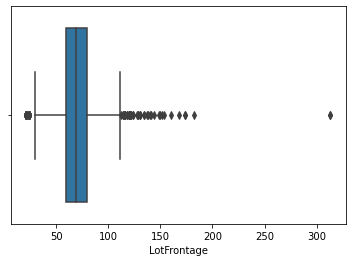

In [10]:
sns.boxplot(odata['LotFrontage'])

`Imputing the null values with median in 'LotFrontage'`

In [11]:
# Imputing the null values with median i.e, 69
odata["LotFrontage"]=odata["LotFrontage"].fillna(69)

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

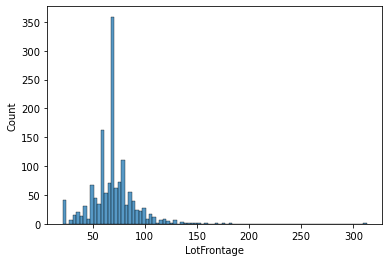

In [12]:
sns.histplot(odata['LotFrontage'])

####    

In [13]:
# Knowing the variable 'GarageYrBlt'
odata['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [14]:
odata['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Count'>

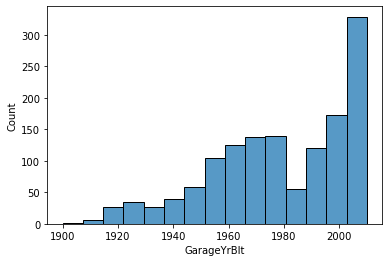

In [15]:
sns.histplot(odata['GarageYrBlt'])

`For missing values of 'GarageYrBlt' actually the garage is not built,
 So imputing 0 inplace of null values where 0 means 'No_Garage_built'.`

In [16]:
odata['GarageYrBlt'] = odata['GarageYrBlt'].fillna(0)

`As per dictionary 'NA' means 'No Garage' in 'GarageType'.
As per dictionary 'NA' means 'No Garage' in 'GarageFinish'.
As per dictionary 'NA' means 'No Garage' in 'GarageQual'.
As per dictionary 'NA' means 'No Garage' in 'GarageCond'.
Every 'NA' value is replaced with the original dictionary value.`

In [17]:
Garage=['GarageType','GarageFinish','GarageQual','GarageCond']
# Imputing the null values in above mentioned columns
for i in Garage:
    odata[i] = odata[i].fillna('No_Garage')

In [18]:
null_columns(odata)

variable  null_count  percentage_of_missing_data
32  BsmtExposure          38                    2.602740
35  BsmtFinType2          38                    2.602740
30      BsmtQual          37                    2.534247
31      BsmtCond          37                    2.534247
33  BsmtFinType1          37                    2.534247
25    MasVnrType           8                    0.547945
26    MasVnrArea           8                    0.547945
42    Electrical           1                    0.068493

`As per dictionary 'NA' means 'No Basement' in ['BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual'].
Every 'NA' value is replaced with the original dictionary value.`

In [19]:
bsmt=['BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']
# Imputing the null values in above mentioned columns
for i in bsmt:
    odata[i] = odata[i].fillna('No_Basement')

In [20]:
null_columns(odata)

variable  null_count  percentage_of_missing_data
25  MasVnrType           8                    0.547945
26  MasVnrArea           8                    0.547945
42  Electrical           1                    0.068493

`Removing the rows containing the null 'MasVnrType' values.`

In [21]:
odata = odata[~(odata['MasVnrType'].isnull())]

In [22]:
null_columns(odata)

variable  null_count  percentage_of_missing_data
42  Electrical           1                    0.068493

`Removing the rows containing the null 'Electrical' values.`

In [23]:
odata = odata[~(odata['Electrical'].isnull())]

In [24]:
null_columns(odata)

Empty DataFrame
Columns: [variable, null_count, percentage_of_missing_data]
Index: []

In [25]:
# observations after removing null values
oarnv = odata['Id'].count().sum()

In [26]:
print('Percentage of data removed after making decisions on null values is',((obo-oarnv)/obo)*100)

Percentage of data removed after making decisions on null values is 0.6164383561643836


## Analyzing the numerical columns

In [27]:
# Making a copy of data frame
odu = odata.copy()

In [28]:
# Getting list of all numeric columns
cl = list(odu.columns)
cln = []
for i in cl:
    if str(odu[i].dtype) == 'int64':
        cln.append(i)
    elif str(odu[i].dtype) == 'float64':
        cln.append(i)
cln

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

###### Plotting subplot(boxplots) for numerical variables.

<Figure size 432x288 with 0 Axes>

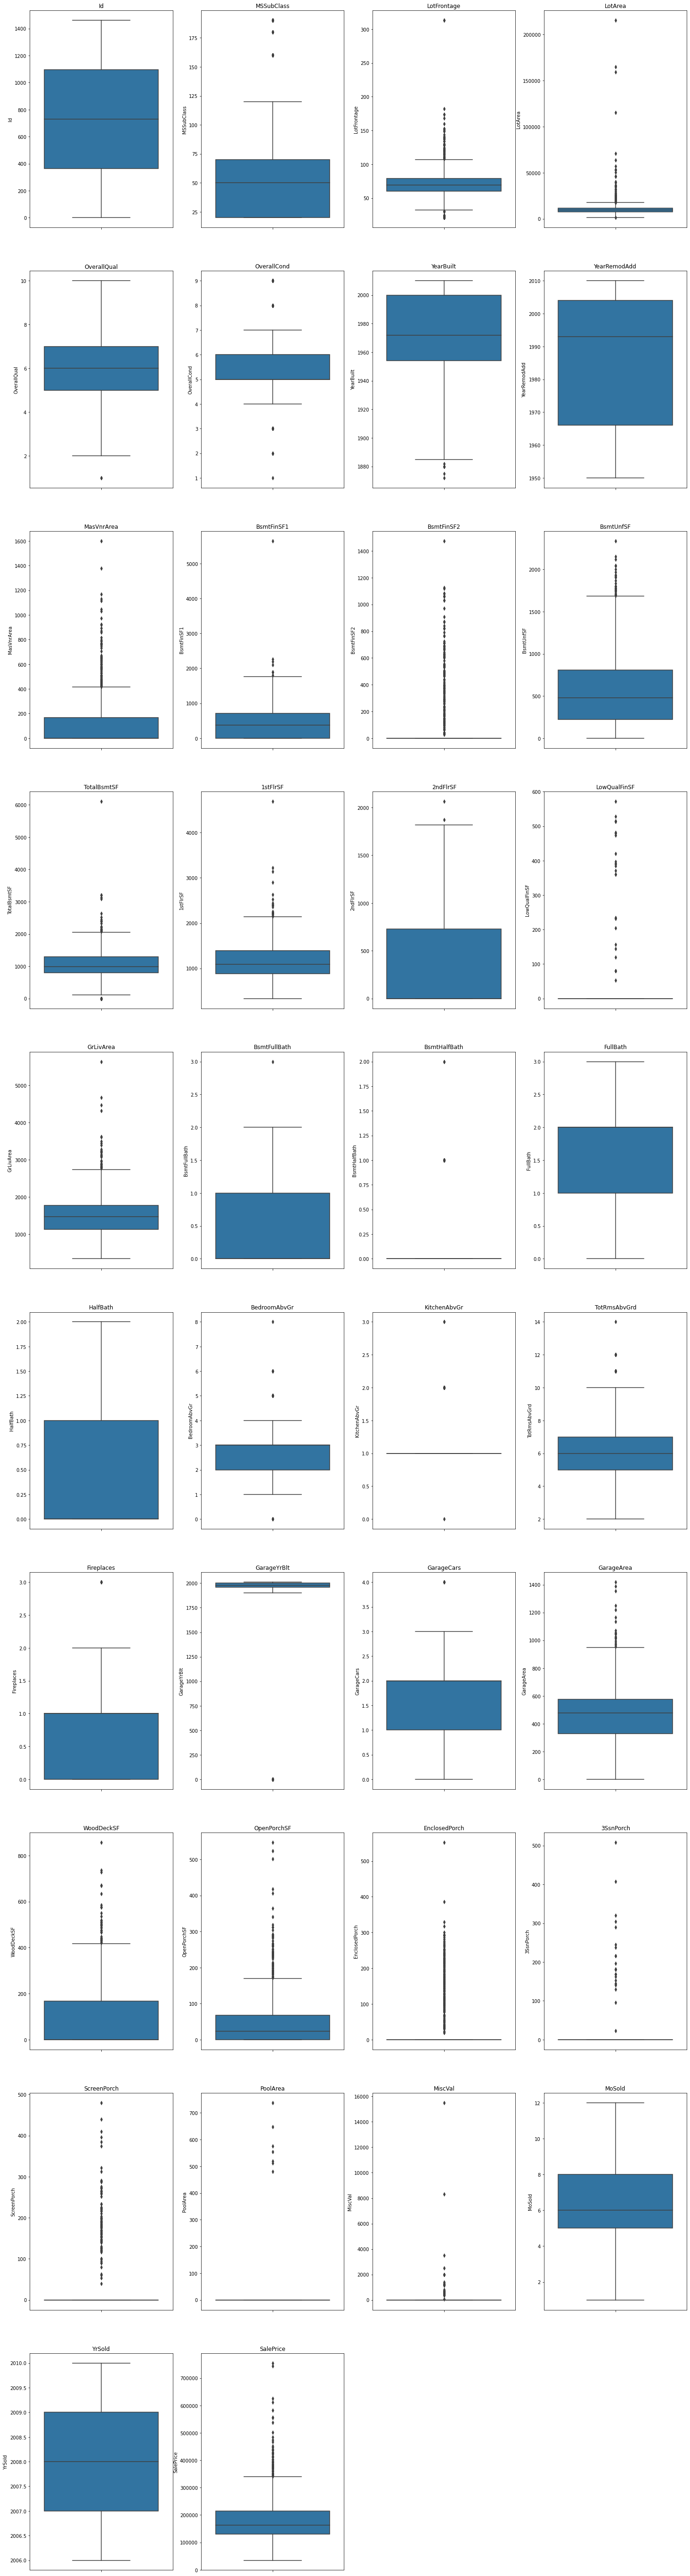

In [29]:
plt.subplots_adjust(wspace=0.05,hspace=0.5)
plt.figure(figsize=(25,100))
for i,v in enumerate(cln):
    a=plt.subplot(10,4,i+1)
    sns.boxplot(y=odu[v], orient = "h")
    a.set_title(v)
plt.show()

## 

`'Id' doesn't have any significance in analysis.
 So 'Id' can be dropped.`

In [30]:
# Dropping 'Id'
odu = odu.drop(columns=['Id'])
cl.remove('Id')
cln.remove('Id')

### 

`During analysis it is observed that ['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','MoSold','YrSold'] are categoal variables.`

In [31]:
# List of all categorical columns which are observed in numeric
clnc = ['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','MoSold','YrSold'] 

#### Converting the variables to categorical which are observed in numeric

###### `The values for ['MSSubClass', 'OverallQual', 'OverallCond'] are to be mapped from the given dictionary`

In [32]:
# Changing numericals to categorical in 'MSSubClass'
MSSubClass_l1 = [20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190,]
MSSubClass_l2 = ['1-STORY 1946 & NEWER ALL STYLES','1-STORY 1945 & OLDER','1-STORY W/FINISHED ATTIC ALL AGES','1-1/2 STORY - UNFINISHED ALL AGES','1-1/2 STORY FINISHED ALL AGES','2-STORY 1946 & NEWER','2-STORY 1945 & OLDER','2-1/2 STORY ALL AGES','SPLIT OR MULTI-LEVEL','SPLIT FOYER','DUPLEX - ALL STYLES AND AGES','1-STORY PUD (Planned Unit Development) - 1946 & NEWER','1-1/2 STORY PUD - ALL AGES','2-STORY PUD - 1946 & NEWER','PUD - MULTILEVEL - INCL SPLIT LEV/FOYER','2 FAMILY CONVERSION - ALL STYLES AND AGES']

for i in range (0,len(MSSubClass_l1)):
    odu['MSSubClass'] = odu['MSSubClass'].apply(lambda x : MSSubClass_l2[i] if x==MSSubClass_l1[i] else x)

odu.head(2)

MSSubClass MSZoning  LotFrontage  LotArea Street  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   

      Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0  No_alley      Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1  No_alley      Reg         Lvl    AllPub       FR2       Gtl      Veenker   

  Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
0       Norm       Norm     1Fam     2Story            7            5   
1      Feedr       Norm     1Fam     1Story            6            8   

   YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       2003          2003     Gable  CompShg     VinylSd     VinylSd   
1       1976          1976     Gable  CompShg     MetalSd     MetalSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA        Ex          Y      SBrkr       856       854   
1         1262    GasA        Ex          Y      SBrkr      1262         0   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   

   Fireplaces   FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
0           0  No_Fireplace     Attchd       2003.0          RFn           2   
1           1            TA     Attchd       1976.0          RFn           2   

   GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  \
0         548         TA         TA          Y           0           61   
1         460         TA         TA          Y         298            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   PoolQC     Fence  \
0              0          0            0         0  No_Pool  No_Fence   
1              0          0            0         0  No_Pool  No_Fence   

  MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
0        None        0       2    2008       WD        Normal     208500  
1        None        0       5    2007       WD        Normal     181500

In [33]:
# Changing numericals to categorical in ['OverallQual', 'OverallCond']
Overall_l0 = ['OverallQual', 'OverallCond']
Overall_l1 = [10,9,8,7,6,5,4,3,2,1]
Overall_l2 = ['Very Excellent','Excellent','Very Good','Good','Above Average','Average','Below Average','Fair','Poor','Very Poor']

for j in Overall_l0:    
    for i in range (0,len(Overall_l1)):
        odu[j] = odu[j].apply(lambda x : Overall_l2[i] if x == Overall_l1[i] else x)

odu.head(2)

MSSubClass MSZoning  LotFrontage  LotArea Street  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   

      Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
0  No_alley      Reg         Lvl    AllPub    Inside       Gtl      CollgCr   
1  No_alley      Reg         Lvl    AllPub       FR2       Gtl      Veenker   

  Condition1 Condition2 BldgType HouseStyle    OverallQual OverallCond  \
0       Norm       Norm     1Fam     2Story           Good     Average   
1      Feedr       Norm     1Fam     1Story  Above Average   Very Good   

   YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       2003          2003     Gable  CompShg     VinylSd     VinylSd   
1       1976          1976     Gable  CompShg     MetalSd     MetalSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
0           No          GLQ         706          Unf           0        150   
1           Gd          ALQ         978          Unf           0        284   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0          856    GasA        Ex          Y      SBrkr       856       854   
1         1262    GasA        Ex          Y      SBrkr      1262         0   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             3             1          Gd             8        Typ   
1             3             1          TA             6        Typ   

   Fireplaces   FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
0           0  No_Fireplace     Attchd       2003.0          RFn           2   
1           1            TA     Attchd       1976.0          RFn           2   

   GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  \
0         548         TA         TA          Y           0           61   
1         460         TA         TA          Y         298            0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   PoolQC     Fence  \
0              0          0            0         0  No_Pool  No_Fence   
1              0          0            0         0  No_Pool  No_Fence   

  MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
0        None        0       2    2008       WD        Normal     208500  
1        None        0       5    2007       WD        Normal     181500

## 

###### Getting list of only numeric columns

In [34]:
clno = [i for i in cln if i not in clnc]
clno

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

###### Plotting subplot(boxplots) for numerical variables.

<Figure size 432x288 with 0 Axes>

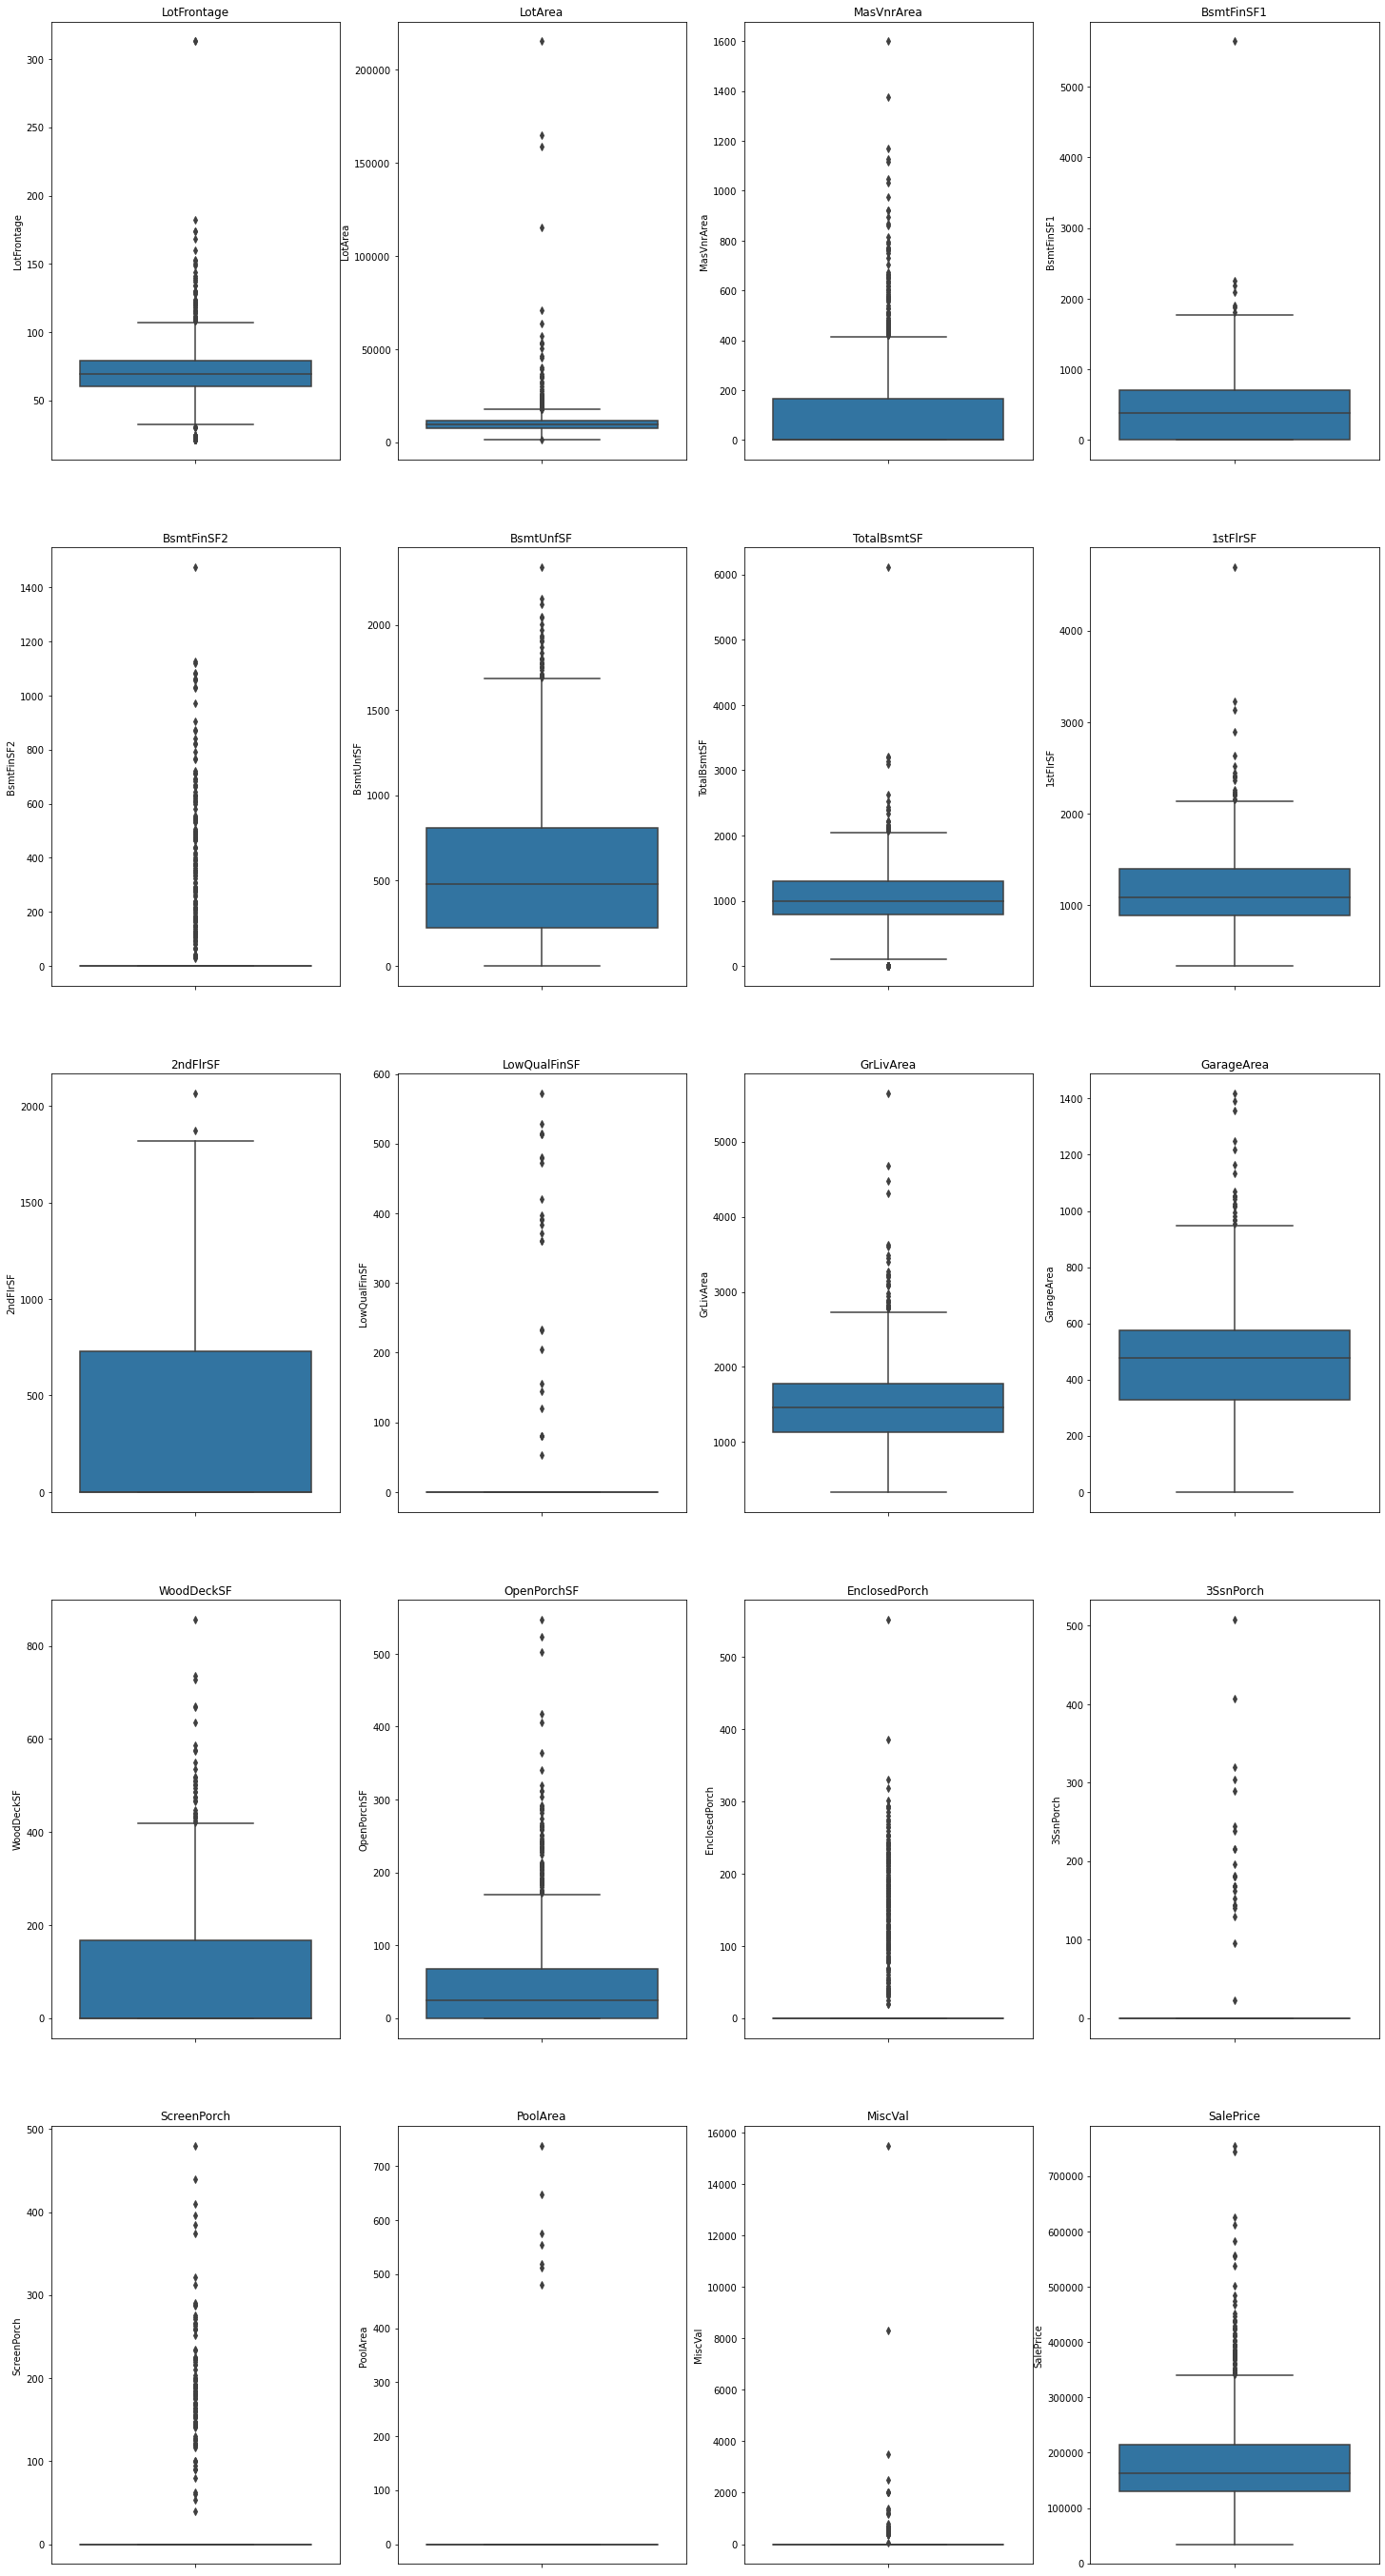

In [35]:
plt.subplots_adjust(wspace=0.05,hspace=0.5)
plt.figure(figsize=(25,100))
for i,v in enumerate(clno):
    a=plt.subplot(10,4,i+1)
    sns.boxplot(y=odu[v], orient = "h")
    a.set_title(v)
plt.show()

`From the above plots the outliers can be seen. 
 But to understand the relation between the numerical varibles a pairplot is drawn below.`

####    

###### Taking pair plot for numerical varibles

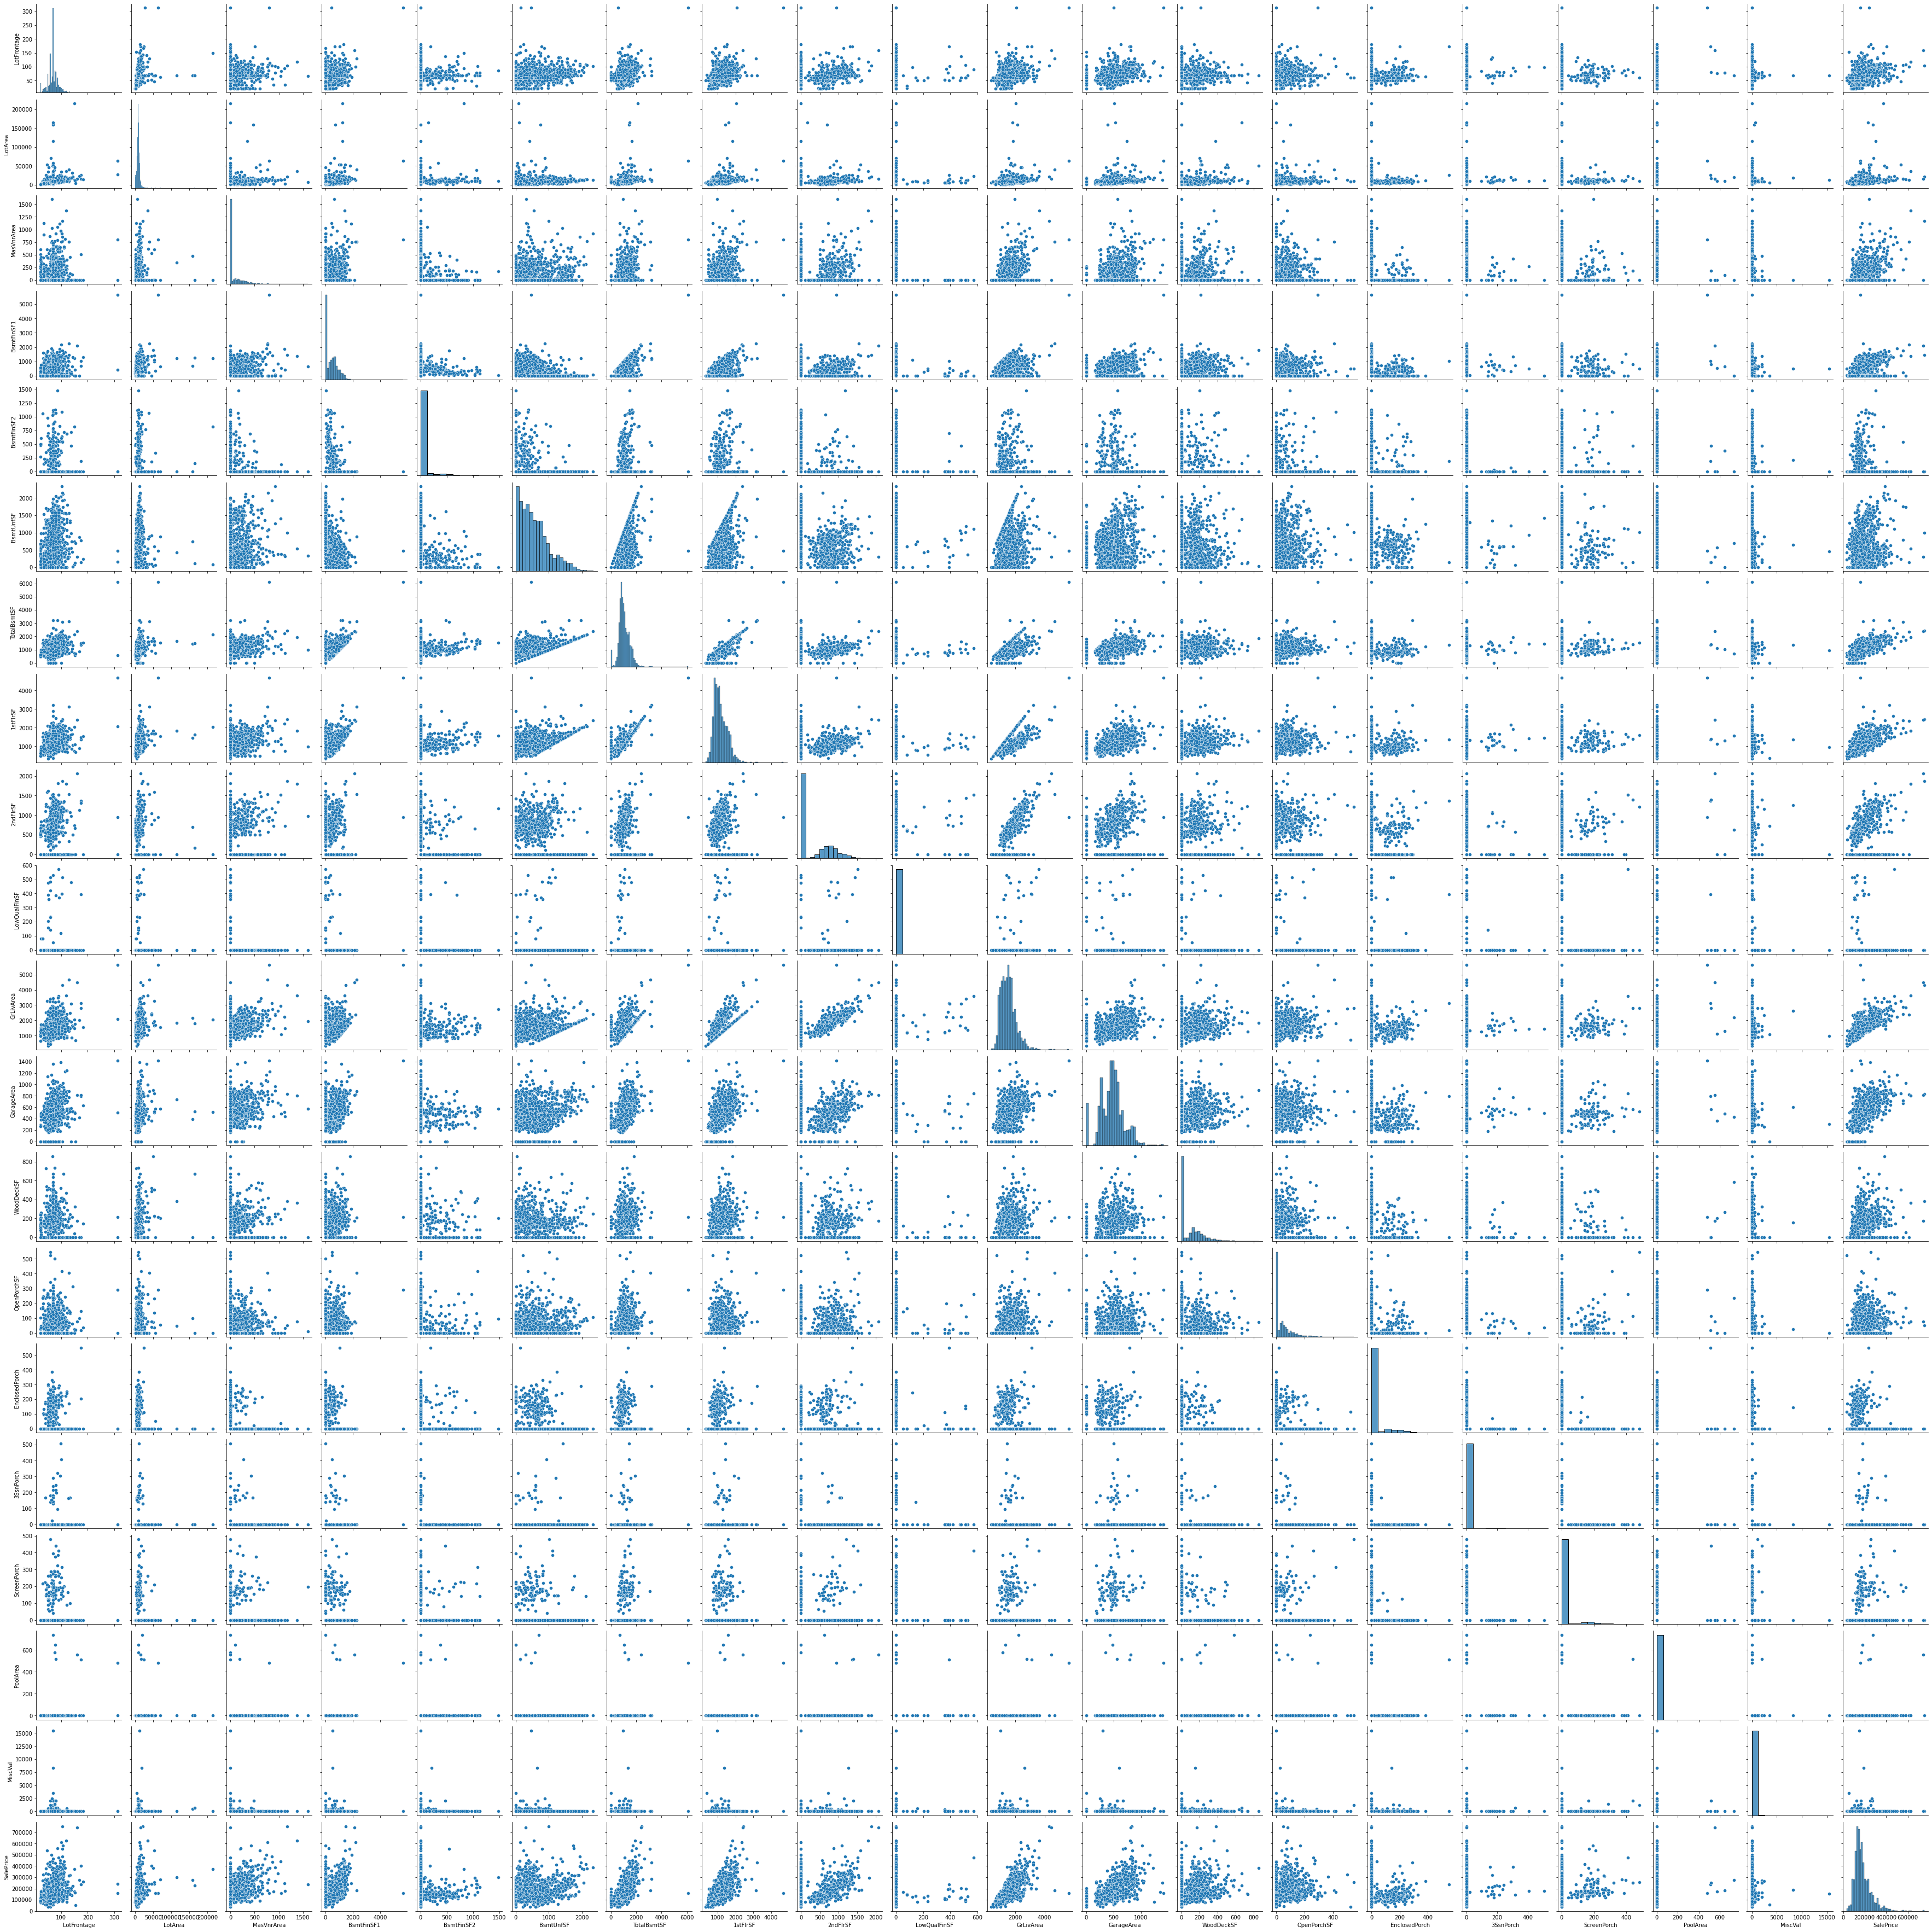

In [36]:
sns.pairplot(odu, vars = clno)

<AxesSubplot:>

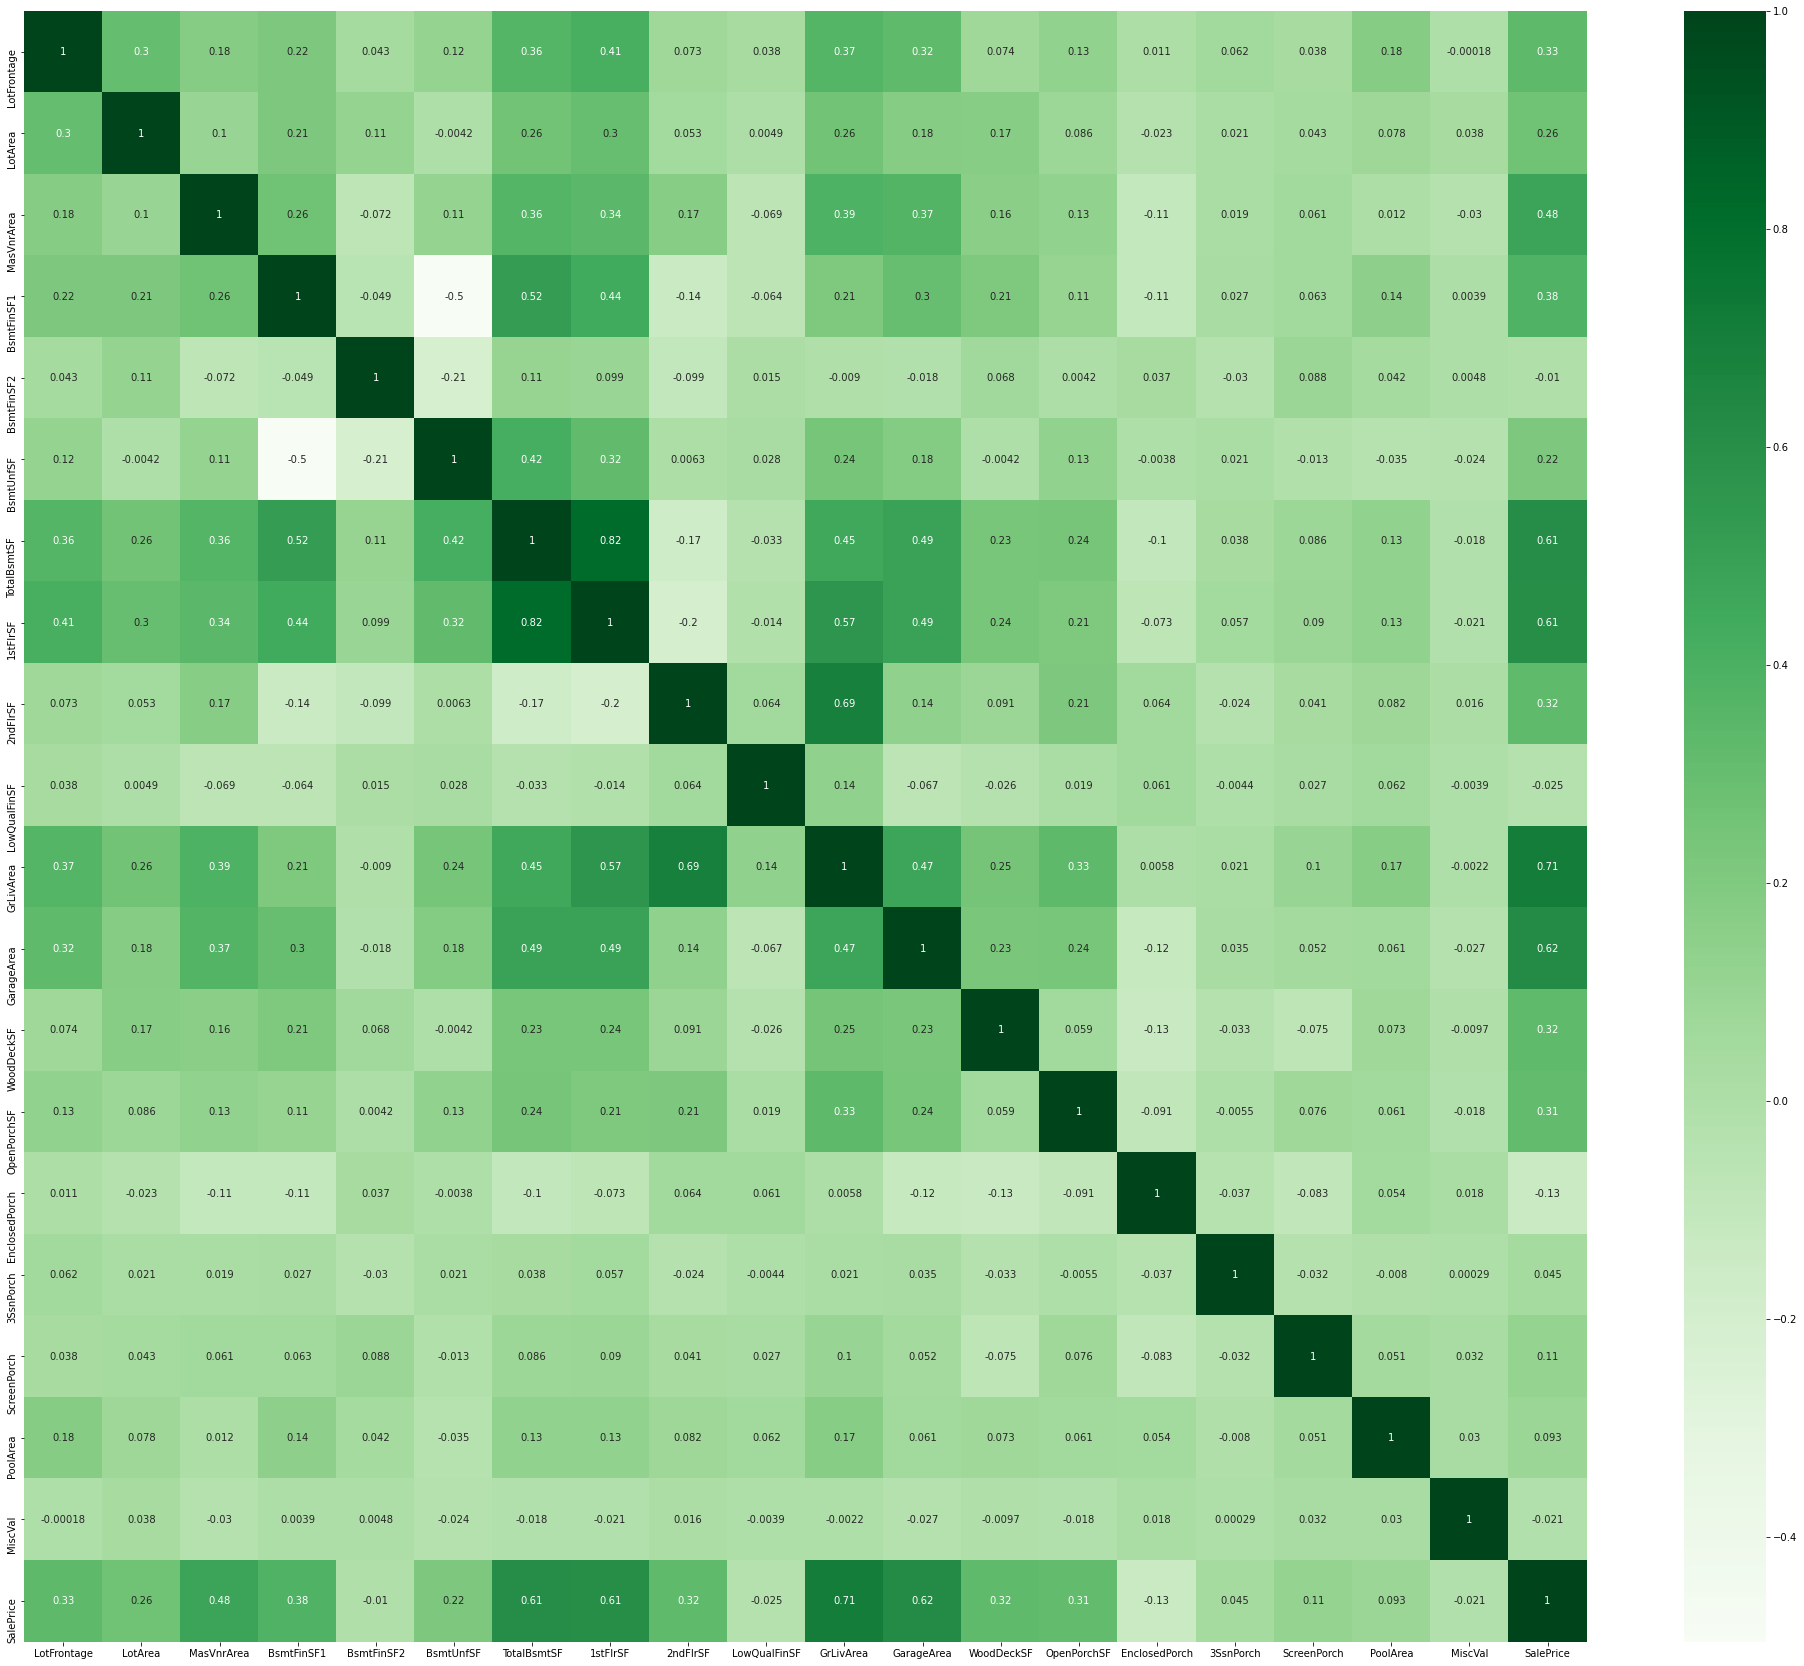

In [37]:
plt.figure(figsize = (35, 30))
sns.heatmap(odu[clno].corr(),annot = True, cmap="Greens")

`From the above plots the outliers seen are natural outliers. 
Every outlier of one varible has a valid explanation in terms of other varibles, And also the effect of outliers is not so high since the difference is not too high.`

`From the above heatmap the correlation between the variables is observed but as of now we don't perform any manual feature elimination at this stage, so we ignore the correlation between independent variables .`

# 


## Analyzing the categorical columns

`Since our target variable is 'SalesPrice'.
So we perform the analysis of categorical variables on salesprice.`

##### Getting list of only categorical columns

In [38]:
clc = [i for i in list(odu.columns) if i not in clno]
clc

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [39]:
# List of columns which consists years and months
clcyr = ['YearBuilt', 'YearRemodAdd','GarageYrBlt','YrSold','MoSold']

# list of categorical varibles excluding years
clcnyr = [i for i in clc if i not in clcyr]

In [40]:
print('no.of Total varibles -',len(cl))
print('no.of variables found out to be numerical by type are -',len(cln))
print('no.of variables considered as catagorical from obtained numerical -',len(clnc))
print('no.of variables that are actually numeric -',len(clno))
print('no.of variables that are actually catgorical -',len(clc))
print('no.of variables which consists month and year -',len(clcyr))
print('no.of categorical varibles excluding month and year -',len(clcnyr))

no.of Total varibles - 80
no.of variables found out to be numerical by type are - 37
no.of variables considered as catagorical from obtained numerical - 17
no.of variables that are actually numeric - 20
no.of variables that are actually catgorical - 60
no.of variables which consists month and year - 5
no.of categorical varibles excluding month and year - 55


###### plotting the box, line(mean) and countplots for categorical varibles excluding years and  months

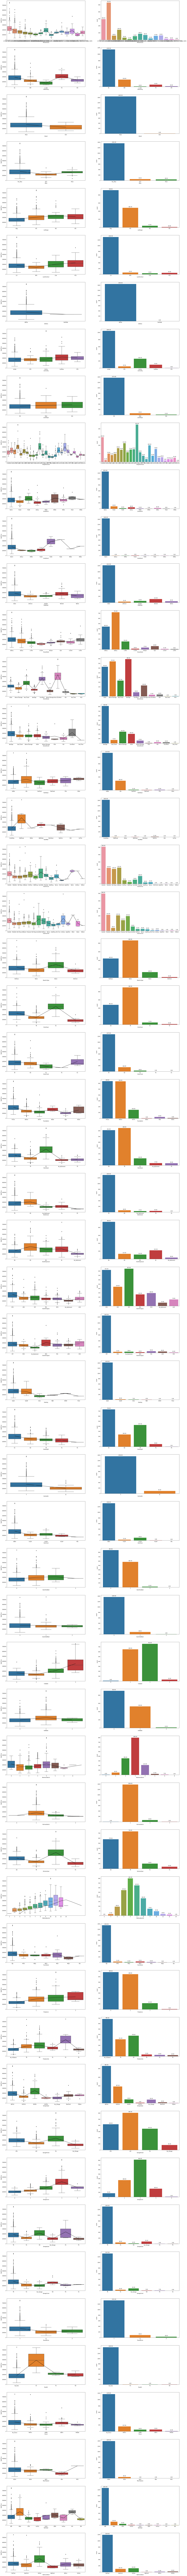

In [41]:
plt.figure(figsize=(30,500))
plotnum = 1
for i,v in enumerate(clcnyr):
    plt.subplot(60,2,plotnum)
    sns.boxplot(x=odu[v], y=odu['SalePrice'])
    sns.lineplot(x=odu[v], y=odu['SalePrice'], color='black', ci =None)
    plotnum += 1
    plt.subplot(60,2,plotnum)
    plots = sns.countplot(x=v, data=odu)
    for bar in plots.patches: 
        plots.annotate(format(bar.get_height(), '.2f'),  
                        (bar.get_x() + bar.get_width() / 2,  
                        bar.get_height()), ha='center', va='center', 
                        size=10, xytext=(0, 10), 
                        textcoords='offset points')
    plotnum += 1

`From the above plots the mean, median, spread of data for categorical varibles is observed and also the count of sub-categorical varibles is observed in categorical varible.`

`It is observed that for some of the sub-categories the count is very low.
So the low count sub categories are clubbed to one sub-category aclled 'Misc_Cvalues'.`

In [42]:
print('5% of the total data is equal to',1451*0.05,'values')

5% of the total data is equal to 72.55 values


### 

##### Creating a dataframe to get the %count of sub-categorical variable

`It is observed that for Neighborhood there are many sub-categories below count 72.
clubbing all these makes the clubbed category insignificant in drawing the insights
So Neighborhood is excluded from clubbing'.`

In [43]:
# These are the rating columns
l_rated=['OverallQual','OverallCond','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']

In [44]:
clcnyr_eNei = clcnyr.copy()
clcnyr_eNei.remove('Neighborhood')

clc_selected = [i for i in clcnyr_eNei if i not in l_rated]

In [45]:
# Making a copy of dataframe for further analysis
oduc=odu.copy()

# Creating a dataframe to get the %count of sub-categorical variable
ldt=[]
for i in clc_selected:
    dt=dict(oduc[i].value_counts())
    for j in dt:
        ldt.append([i,j,(dt[j]/1451)*100])
tfd = pd.DataFrame(data = ldt, columns = ['variable','sub_category','percentage_count_contribution'])
tfd.head()

variable                                       sub_category  \
0  MSSubClass                    1-STORY 1946 & NEWER ALL STYLES   
1  MSSubClass                               2-STORY 1946 & NEWER   
2  MSSubClass                      1-1/2 STORY FINISHED ALL AGES   
3  MSSubClass  1-STORY PUD (Planned Unit Development) - 1946 ...   
4  MSSubClass                               1-STORY 1945 & OLDER   

   percentage_count_contribution  
0                      36.664369  
1                      20.399724  
2                       9.924190  
3                       5.926947  
4                       4.755341

###### Replacing the sub-category for which the data contibution is below 5% of total data to 'Misc_Cvalues'

In [46]:
for i in clc_selected:
    tl = list(tfd[(tfd['percentage_count_contribution']<5) & (tfd['variable']==i)]['sub_category'].unique())
    if len(tl)>1:
        for j in tl:
            oduc[i] = oduc[i].replace([j],'Misc_Cvalues')

###### Plotting count plots before and after clubbing of 5% data

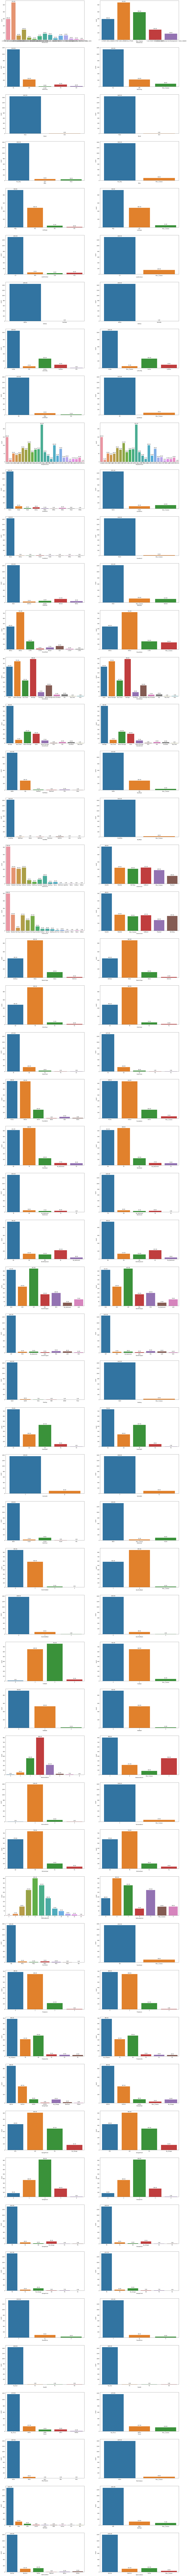

In [47]:
plt.figure(figsize=(30,500))
plotnum = 1
for i,v in enumerate(clcnyr):
    plt.subplot(60,2,plotnum)
    plots = sns.countplot(x=v, data=odu)
    for bar in plots.patches: 
        plots.annotate(format(bar.get_height(), '.2f'),  
                        (bar.get_x() + bar.get_width() / 2,  
                        bar.get_height()), ha='center', va='center', 
                        size=10, xytext=(0, 10), 
                        textcoords='offset points')
    plotnum += 1
    plt.subplot(60,2,plotnum)
    plots = sns.countplot(x=v, data=oduc)
    for bar in plots.patches: 
        plots.annotate(format(bar.get_height(), '.2f'),  
                        (bar.get_x() + bar.get_width() / 2,  
                        bar.get_height()), ha='center', va='center', 
                        size=10, xytext=(0, 10), 
                        textcoords='offset points')
    plotnum += 1

####  

###### plotting the box and countplots for categorical varibles excluding years and months after clubbing

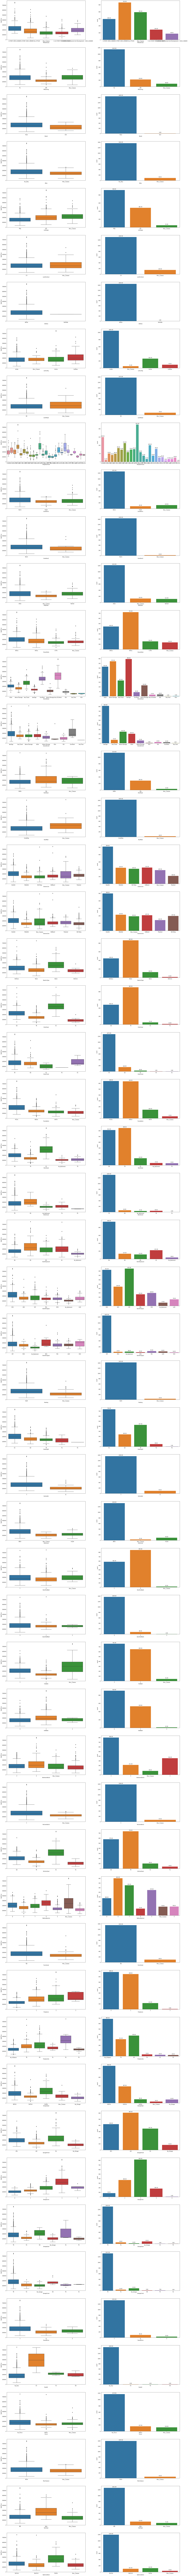

In [48]:
plt.figure(figsize=(30,500))
plotnum = 1
for i,v in enumerate(clcnyr):
    plt.subplot(60,2,plotnum)
    sns.boxplot(x=oduc[v], y=oduc['SalePrice'])
    plotnum += 1
    plt.subplot(60,2,plotnum)
    plots = sns.countplot(x=v, data=oduc)
    for bar in plots.patches: 
        plots.annotate(format(bar.get_height(), '.2f'),  
                        (bar.get_x() + bar.get_width() / 2,  
                        bar.get_height()), ha='center', va='center', 
                        size=10, xytext=(0, 10), 
                        textcoords='offset points')
    plotnum += 1

#### 

`we have so many years in columns which consists sub categories as years
So for the analysis purpose we bin the years.
But in final model the years are not binned.`

In [49]:
# data frame to do analysis on year columns
oduy = odu.copy()

In [50]:
# binning the years to perform analysis
for i,v in enumerate(clcyr):
    oduy[v] = pd.qcut(oduy[v],q=5, duplicates = 'drop')

###### plotting the bar(mean) and countplots for categorical varibles which only includes years and months(binned)

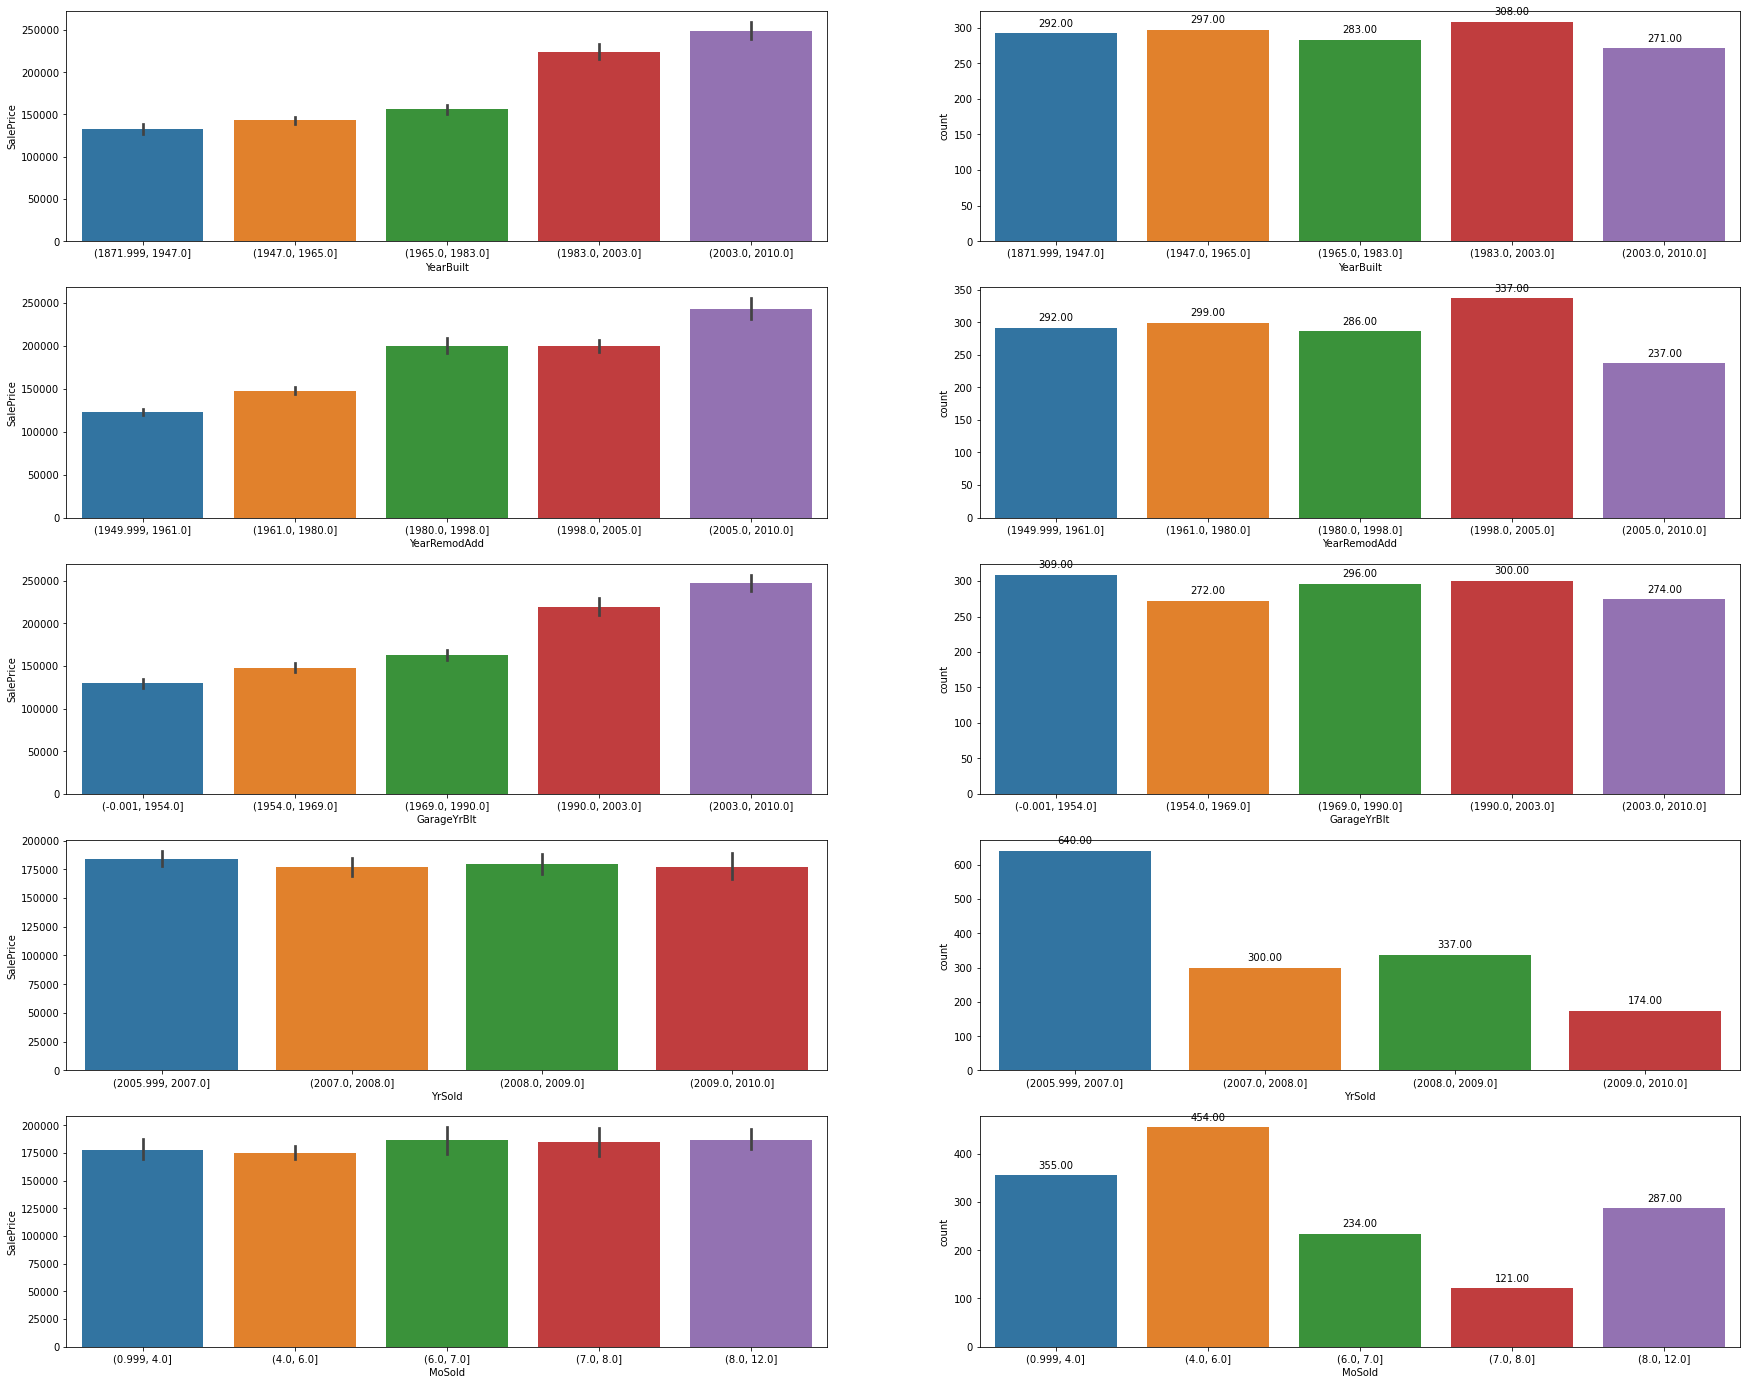

In [51]:
plt.figure(figsize=(30,50))
plotnum = 1
for i,v in enumerate(clcyr):
    plt.subplot(10,2,plotnum)
    sns.barplot(x=oduy[v], y=odu['SalePrice'])
    plotnum+=1
    plt.subplot(10,2,plotnum)
    plots = sns.countplot(x=v, data=oduy)
    for bar in plots.patches: 
        plots.annotate(format(bar.get_height(), '.2f'),  
                        (bar.get_x() + bar.get_width() / 2,  
                        bar.get_height()), ha='center', va='center', 
                        size=10, xytext=(0, 10), 
                        textcoords='offset points')
    plotnum+=1

###### plotting the bar(mean) and countplots for months(not binned)

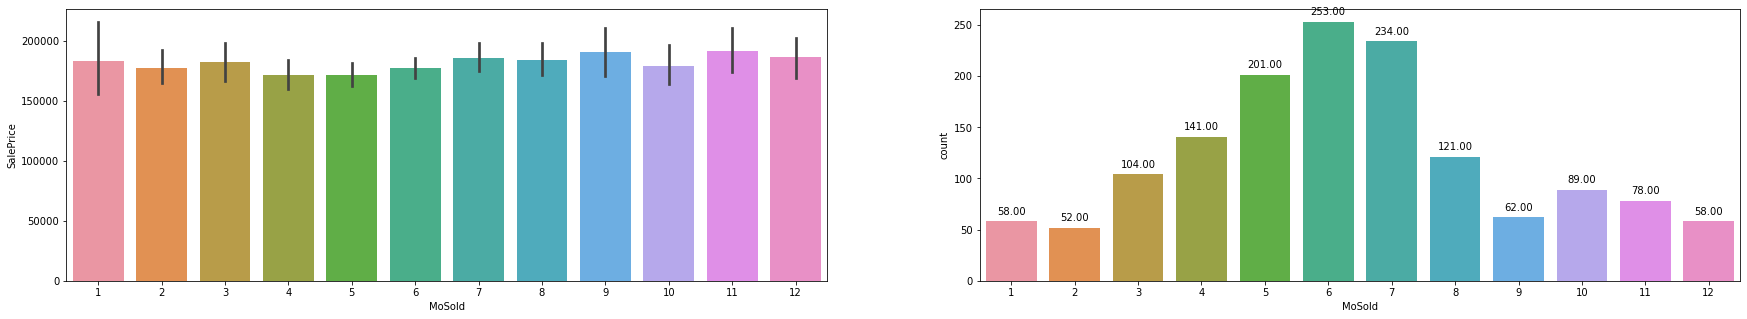

In [52]:
plt.figure(figsize=(30,5))
plt.subplot(1,2,1)
sns.barplot(x=odu['MoSold'], y=odu['SalePrice'])
plt.subplot(1,2,2)
plots = sns.countplot(x='MoSold', data=odu)
for bar in plots.patches: 
    plots.annotate(format(bar.get_height(), '.2f'),  
                    (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                    size=10, xytext=(0, 10), 
                    textcoords='offset points')

`From the above plots the trend of salesprice with year categorical varibles and count is observed.`

`Observations:`<br>
`- The count is almost same for ['YearBuilt', 'YearRemodAdd','GarageYrBlt'], for ['YrSold'] the count is decreased.`<br>
`- The average sales prices shows increasing trend for ['YearBuilt', 'YearRemodAdd','GarageYrBlt'], for ['YrSold','MoSold'] the average sales prices is same.`

### 

# Preparing data for regression model

In [53]:
oduc.shape

(1451, 80)

### Dummy variable creation

##### Creating the dataframe with dummy variables

In [54]:
dfm = pd.get_dummies(oduc, columns = clc)
pd.set_option('display.max_columns', None)
dfm.head()

LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0     8450       196.0         706           0        150   
1         80.0     9600         0.0         978           0        284   
2         68.0    11250       162.0         486           0        434   
3         60.0     9550         0.0         216           0        540   
4         84.0    14260       350.0         655           0        490   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0          856       856       854             0       1710         548   
1         1262      1262         0             0       1262         460   
2          920       920       866             0       1786         608   
3          756       961       756             0       1717         642   
4         1145      1145      1053             0       2198         836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   MiscVal  SalePrice  MSSubClass_1-1/2 STORY FINISHED ALL AGES  \
0        0     208500                                         0   
1        0     181500                                         0   
2        0     223500                                         0   
3        0     140000                                         0   
4        0     250000                                         0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   MSSubClass_2-STORY 1946 & NEWER  MSSubClass_Misc_Cvalues  \
0                                1                        0   
1                                0                        0   
2                                1                        0   
3                                0                        1   
4                                1                        0   

   MSZoning_Misc_Cvalues  MSZoning_RL  MSZoning_RM  Street_Grvl  Street_Pave  \
0                      0            1            0            0            1   
1                      0            1            0            0            1   
2                      0            1            0            0            1   
3                      0            1            0            0            1   
4                      0            1            0            0            1   

   Alley_Misc_Cvalues  Alley_No_alley  LotShape_IR1  LotShape_Misc_Cvalues  \
0                   0               1             0                      0   
1                   0               1             0                      0   
2                   0               1             1                      0   
3                   0               1             1                      0   
4                   0               1             1                      0   

   LotShape_Reg  LandContour_Lvl  LandContour_Misc_Cvalues  Utilities_AllPub  \
0             1                1                         0                 1   
1             1   

In [55]:
dfm.shape

(1451, 550)

##### 

##### Splitting the data to test and train

In [56]:
np.random.seed(0)
dfm_train, dfm_test = train_test_split(dfm, train_size = 0.7, test_size = 0.3, random_state=30)

#### Scaling the data using minmax scale

In [57]:
# Using minmax scaling
scaler = MinMaxScaler()

In [58]:
# Fit transforming train data
dfm_train[clno] = scaler.fit_transform(dfm_train[clno])

In [59]:
# Transforming test data
dfm_test[clno] = scaler.transform(dfm_test[clno])

In [60]:
dfm_train.head(2)

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
1449     0.000000  0.000262         0.0     0.09798         0.0   0.035764   
693      0.133562  0.018352         0.0     0.00000         0.0   0.498374   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
1449     0.103110  0.067921       0.0           0.0   0.055765    0.000000   
693      0.175614  0.169573       0.0           0.0   0.139224    0.229901   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
1449         0.0          0.0       0.000000        0.0          0.0   
693          0.0          0.0       0.339394        0.0          0.0   

      PoolArea  MiscVal  SalePrice  MSSubClass_1-1/2 STORY FINISHED ALL AGES  \
1449       0.0      0.0   0.078769                                         0   
693        0.0      0.0   0.101668                                         0   

      MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
1449                                           0   
693                                            0   

      MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
1449                                                  0                  
693                                                   0                  

      MSSubClass_2-STORY 1946 & NEWER  MSSubClass_Misc_Cvalues  \
1449                                0                        1   
693                                 0                        1   

      MSZoning_Misc_Cvalues  MSZoning_RL  MSZoning_RM  Street_Grvl  \
1449                      0            0            1            0   
693                       0            1            0            0   

      Street_Pave  Alley_Misc_Cvalues  Alley_No_alley  LotShape_IR1  \
1449            1                   0               1             0   
693             1                   0               1             0   

      LotShape_Misc_Cvalues  LotShape_Reg  LandContour_Lvl  \
1449                      0             1                1   
693                       0             1                1   

      LandContour_Misc_Cvalues  Utilities_AllPub  Utilities_NoSeWa  \
1449                         0                 1                 0   
693                          0                 1                 0   

      LotConfig_Corner  LotConfig_CulDSac  LotConfig_Inside  \
1449                 0                  0                 1   
693                  1                  0                 0   

      LotConfig_Misc_Cvalues  LandSlope_Gtl  LandSlope_Misc_Cvalues  \
1449                       0              1                       0   
693                        0              0                       1   

      Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
1449                     0                     0                    0   
693                      0                     0                    0   

      Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
1449                     0                     0                     0   
693                      0                     0                     0   

      Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
1449                     0                     0                     0   
693                      0                     0                     0   

      Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
1449                    0                     1                     0   
693                     0                     0                     0   

      Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
1449                   0                     0                    0   
693                    0                     0                    0   

      Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
1449                     0                     0                     0   
693                     

In [61]:
dfm_test.head(2)

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
927     0.164384  0.039403     0.21375    0.097803         0.0   0.130051   
471     0.243151  0.049002     0.00000    0.000000         0.0   0.375290   

     TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
927     0.136170  0.175310  0.470085           0.0   0.309721    0.342736   
471     0.132242  0.189766  0.431624           0.0   0.308026    0.376587   

     WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
927         0.0     0.078611            0.0        0.0        0.000       0.0   
471         0.0     0.000000            0.0        0.0        0.575       0.0   

     MiscVal  SalePrice  MSSubClass_1-1/2 STORY FINISHED ALL AGES  \
927      0.0   0.195486                                         0   
471      0.0   0.214939                                         0   

     MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
927                                           0   
471                                           0   

     MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
927                                                  0                  
471                                                  0                  

     MSSubClass_2-STORY 1946 & NEWER  MSSubClass_Misc_Cvalues  \
927                                1                        0   
471                                1                        0   

     MSZoning_Misc_Cvalues  MSZoning_RL  MSZoning_RM  Street_Grvl  \
927                      0            1            0            0   
471                      0            1            0            0   

     Street_Pave  Alley_Misc_Cvalues  Alley_No_alley  LotShape_IR1  \
927            1                   0               1             0   
471            1                   0               1             0   

     LotShape_Misc_Cvalues  LotShape_Reg  LandContour_Lvl  \
927                      0             1                1   
471                      0             1                1   

     LandContour_Misc_Cvalues  Utilities_AllPub  Utilities_NoSeWa  \
927                         0                 1                 0   
471                         0                 1                 0   

     LotConfig_Corner  LotConfig_CulDSac  LotConfig_Inside  \
927                 0                  0                 1   
471                 0                  0                 1   

     LotConfig_Misc_Cvalues  LandSlope_Gtl  LandSlope_Misc_Cvalues  \
927                       0              1                       0   
471                       0              1                       0   

     Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
927                     0                     0                    0   
471                     0                     0                    0   

     Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
927                     0                     0                     0   
471                     0                     0                     0   

     Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
927                     0                     0                     0   
471                     0                     0                     0   

     Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
927                    0                     0                     0   
471                    0                     0                     0   

     Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
927                   0                     0                    1   
471                   0                     0                    1   

     Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
927                     0                     0                     0   
471                     0                     0                     0   

     

##### Splitting data to x and y trains

In [62]:
# Splitting train data
y_train = dfm_train.pop('SalePrice')
X_train = dfm_train

In [63]:
# Getting list of all varibles in x train dataset
Xvar = list(X_train.columns)

In [64]:
# Splitting test data
y_test = dfm_test.pop('SalePrice')
X_test = dfm_test

## 

# Model building

### Model building with RFE and Manual Feature Elimination(MFE)

###### Performing RFE 

In [65]:
# Getting lm
lm = LinearRegression()

# Fitting the linear model
lm.fit(X_train, y_train)

# Running RFE to drop 150 variables 
rfe = RFE(lm,100)

# Fitting the RFE model
rfe = rfe.fit(X_train, y_train)
        
# Knowing the rfe support and rank
drfe = {'X_train':X_train.columns,'RFE_decision':rfe.support_,'Rank_rfe':rfe.ranking_}
dfrfe = pd.DataFrame(data=drfe)
    
# Columns removed by performing RFE
Lrfe_reject = list(dfrfe[dfrfe.RFE_decision == False]['X_train'])


#####  Defining a function for VIF values

In [66]:
# Defining a function to give VIF values for a given X_train
def VIFvalues(x_trn):
    vif = pd.DataFrame()
    X = x_trn
    vif['Variables'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    return vif

###### Automating the manual feature elimination (using P and VIF values)

In [67]:
# Dropping the variables which are rejected by RFE
X_train_rfe = X_train.copy()
X_train_rfe = X_train_rfe.drop(Lrfe_reject , axis = 1)

# Invoking list to get the dataframe for verification
lfdfi = []

for i in range(0,100):
    
    print('Running',i,'th iteration,','variables are cut down to',100-i,'variables')
    
    # Fitting the lm model
    X_train_c = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train, X_train_c).fit()
    
    # Getting the dataframe for values of co-efficients
    Coeff_table = pd.DataFrame(lm.params[X_train_rfe.columns])
    Coeff_table.rename(columns = {0:'coeff'}, inplace = True)
    
    # Getting the dataframe for values of p-values
    Pval_table = pd.DataFrame(round(lm.pvalues[X_train_rfe.columns],3))
    Pval_table.rename(columns = {0:'pval'}, inplace = True)
    
    # Merging the dataframes
    Summary_table= pd.merge(Pval_table,Coeff_table,left_index=True,right_index=True)
       
    # Getting VIF values
    V=VIFvalues(X_train_rfe)
    
    # Merging Summary_table and V
    vt = pd.merge(Summary_table,V,left_index=True,right_on='Variables')
    
    # Sorting the dataframe with p-values
    vt = vt.sort_values(by = 'pval', ascending = False)
    
    global o
    
    # defining function get the dataframe for verification
    def tem(vn,rc):
        tpl = [i,vn,vt['pval'].iloc[0],vt['VIF'].iloc[0],rc]
        return tpl
    
    # Condition for p-value >= 0.05
    if vt['pval'].iloc[0] >= 0.05:
        o = vt['Variables'].iloc[0]
        lfdfi.append(tem(o,'P-val')) #----------------------------------------
        X_train_rfe = X_train_rfe.drop([str(o)], axis = 1)
        
    # Condition for p-value <= 0.05    
    elif vt['pval'].iloc[0] < 0.05:
        vt = vt.sort_values(by = 'VIF', ascending = False)
        
        # Condition for VIF >= 5 
        if vt['VIF'].iloc[0] >= 5:
            o = vt['Variables'].iloc[0]
            lfdfi.append(tem(o,'VIF-val')) #---------------------------------------------------------
            X_train_rfe = X_train_rfe.drop([str(o)], axis = 1)
        elif vt['VIF'].iloc[0] < 5:
            print('Iteration is stopped since saturation is reached at',i)
            break
        
    clear_output(wait=True)

# Dataframe for verification
verifdf = pd.DataFrame(lfdfi, columns = ['iteration','variable','pval','VIF_val','removal_criteria'])
            
lm.summary()

Running 71 th iteration, variables are cut down to 29 variables
Iteration is stopped since saturation is reached at 71


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     119.9
Date:                Mon, 26 Apr 2021   Prob (F-statistic):          2.98e-299
Time:                        21:32:59   Log-Likelihood:                 1592.2
No. Observations:                1015   AIC:                            -3124.
Df Residuals:                     985   BIC:                            -2977.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1956      0.015     13.382      0.000       0.167       0.224
LotConfig_CulDSac             0.0264      0.007      3.880      0.000       0.013       0.040
LandSlope_Misc_Cvalues        0.0294      0.007      3.964      0.000       0.015       0.044
Condition1_Norm               0.0167      0.005      3.381      0.001       0.007       0.026
BldgType_1Fam                 0.0242      0.005      5.150      0.000       0.015       0.033
OverallCond_Above Average     0.0322      0.008      4.001      0.000       0.016       0.048
OverallCond_Average           0.0294      0.008      3.838      0.000       0.014       0.044
OverallCond_Excellent         0.0432      0.015      2.806      0.005       0.013       0.073
OverallCond_Good              0.0430      0.008      5.187      0.000       0.027       0.059
OverallCond_Very Good         0.0488      0.010      4.877      0.000       0.029       0.068
YearBuilt_1892                0.1721      0.056      3.072      0.002       0.062       0.282
RoofMatl_Misc_Cvalues         0.0346      0.013      2.685      0.007       0.009       0.060
Foundation_PConc              0.0230      0.005      4.843      0.000       0.014       0.032
BsmtCond_No_Basement         -0.0431      0.010     -4.209      0.000      -0.063      -0.023
FullBath_1                   -0.0422      0.004     -9.657      0.000      -0.051      -0.034
FullBath_Misc_Cvalues         0.0786      0.011      7.175      0.000       0.057       0.100
KitchenQual_Ex                0.0959      0.008     12.451      0.000       0.081       0.111
KitchenQual_Fa               -0.0230      0.011     -2.072      0.039      -0.045      -0.001
KitchenQual_TA               -0.0199      0.004     -4.527      0.000      -0.029      -0.011
Fireplaces_0                 -0.0255      0.004     -6.605      0.000      -0.033      -0.018
Fireplaces_2                  0.0453      0.006      6.964      0.000       0.033       0.058
FireplaceQu_Ex                0.0488      0.015      3.358      0.001       0.020       0.077
GarageType_Attchd             0.0201      0.004      4.600      0.000       0.012       0.029
GarageType_BuiltIn            0.0300      0.009      3.507      0.000       0.013       0.047
GarageCars_1                 -0.1059      0.007    -14.257      0.000      -0.120      -0.091
GarageCars_2                 -0.0859      0.006    -14.309      0.000      -0.098      -0.074
GarageQual_Gd                 0.0621      0.018      3.387      0.001       0.026       0.098
GarageQual_TA                 0.0230      0.009      2.518      0.012       0.005       0.041
GarageCond_No_Garage         -0.1020      0.013     -8.020      0.000      -0.127      -0.077
SaleType_New                  0.0140      0.007      2.043      0.041      

##### Scores of test and train sets

In [68]:
# Clubbing the rejected variables from RFE and MFE
l_rfe_mfe=Lrfe_reject + list(verifdf['variable'])

# Dropping the variables which are rejected by RFE and Adding Constant to test
X_test_rfe = X_test.copy()
X_test_rfe = X_test_rfe.drop(l_rfe_mfe, axis = 1)
X_test_c = sm.add_constant(X_test_rfe,prepend=True, has_constant='add')
y_test_pred = lm.predict(X_test_c)

a = lm.rsquared_adj
b = r2_score(y_test, y_test_pred)

print('Train Score is',a,'Test Score is',b)
print('Percentage error of score in test and train is',((a-b)/a)*100)

Train Score is 0.7727585965690567 Test Score is 0.7105339728314887
Percentage error of score in test and train is 8.05227195321241


`From train and test scores it is clearly observed that the model is overfit.`

###  

### we need to penalize the model, So ridge and lasso models are to be built.

## Ridge

###### Plotting scores of train and test to get the range of optimum alpha

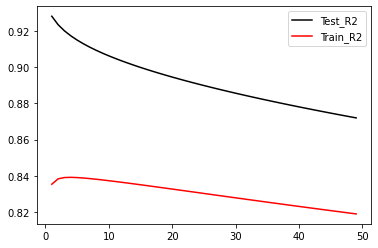

In [69]:
# List to store scores of test data
tst = []

# List to store scores of train data
trn = []

# List to store alpha values
alp = []

for i in range(1,50):
    
    alp.append(i)
    
    # Fitting ridge model
    ridge = Ridge(alpha=i)
    ridge.fit(X_train, y_train)

    # Predicting train and test
    y_pred_train = ridge.predict(X_train)
    y_pred_test = ridge.predict(X_test)

    # Getting score of train data
    r2_train_lr = r2_score(y_train, y_pred_train)
    trn.append(r2_train_lr)

    # Getting score of test data
    r2_test_lr = r2_score(y_test, y_pred_test)
    tst.append(r2_test_lr)
    

# Plotting scores of train and test
plt.plot(alp,trn,color="black")
plt.plot(alp,tst,color="red")
plt.legend(['Test_R2','Train_R2'])

`From the above plots it is observed that optimum alpha lies between 10 to 30.`

##### Running grid search to get the best alpha

In [70]:
# specifying range of hyperparameters to tune
hyper_params = {'alpha': [i for i in range(10,30)]}

# getting ridge
ridge = Ridge()
      

# calling GridSearchCV()
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = hyper_params, 
                        scoring = 'neg_mean_absolute_error', 
                        cv = 5, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   11.2s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
                                   21, 22, 23, 24, 25, 26, 27, 28, 29]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [71]:
# Printing the best hyperparameter alpha
alpha_rfe = model_cv.best_params_['alpha']
print(alpha_rfe)

16


In [72]:
# Fitting Ridge model for alpha and printing coefficients which have been penalised
ridge = Ridge(alpha=alpha_rfe)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-5.56399483e-03  9.37177376e-03  1.50150520e-02  5.73919064e-03
  6.99008842e-03  1.61375165e-02  1.22772332e-02  2.53653675e-02
  2.08488898e-02  7.39546823e-03  2.89754335e-02  1.19625703e-02
  1.43910013e-02  8.09306613e-03  6.10850424e-04  7.51783884e-03
  2.02948980e-02 -3.44216520e-03  7.60141641e-04  8.46120951e-05
  6.79087160e-03 -3.18501576e-03 -8.79103548e-04 -2.81136438e-03
  3.58561461e-03  3.31720537e-03 -6.90281998e-03 -6.40360138e-03
  6.40360138e-03 -1.34590423e-03  1.34590423e-03  6.34718142e-06
  2.31903452e-03 -2.32538170e-03  3.69562930e-03 -3.69562930e-03
  0.00000000e+00  0.00000000e+00  1.16794209e-03  1.26834106e-02
 -4.21633722e-03 -9.63501552e-03 -7.90159674e-03  7.90159674e-03
 -7.33776993e-03 -9.06046799e-04  1.65011583e-03  3.21436659e-03
  9.52509780e-04 -6.78677293e-03  2.02259499e-02 -1.99337831e-02
 -1.07988519e-02 -7.65020009e-03 -1.51016157e-02 -5.36095123e-03
 -1.14274452e-02 -4.19626932e-04 -6.95423187e-03  2.45385485e-02
  2.00553072e-02 -6.86160

In [73]:
# Getting list of all co-efficients
coefr = list(ridge.coef_)

dfr = []
for i in range(0,len(Xvar)):
    dfr.append([Xvar[i],coefr[i]])

# Data frame with varibles and their respective co-efficients
rid = pd.DataFrame(dfr,columns=['variable','coef'])

rid = rid.sort_values(by = 'coef', ascending = False)

rid.head(5)

variable      coef
356  FullBath_Misc_Cvalues  0.032738
84   OverallQual_Excellent  0.032664
10               GrLivArea  0.028975
499           GarageCars_3  0.028509
366         KitchenQual_Ex  0.026435

In [74]:
rid = rid.sort_values(by = 'coef', ascending = True)

rid.head(5)

variable      coef
354                 FullBath_1 -0.026226
51        Neighborhood_Edwards -0.019934
83   OverallQual_Below Average -0.019822
497               GarageCars_1 -0.017869
82         OverallQual_Average -0.016715

##### Train and test score for the best alpha

In [75]:
# calculating R2 score
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score for train data',r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score for test data',r2_test_lr)

print('Percentage error of score in test and train is',((r2_train_lr-r2_test_lr)/r2_train_lr)*100)

R2 score for train data 0.8986873724632993
R2 score for test data 0.8345398430487563
Percentage error of score in test and train is 7.13791373731166


### Model evaluation for ridge 

##### Error terms are normally distributed with mean zero

<Figure size 2160x2160 with 0 Axes>

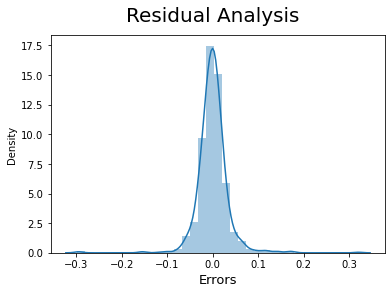

In [76]:
# Plot the histogram of the error terms
plt.figure(figsize = (30, 30))
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 35)
fig.suptitle('Residual Analysis', fontsize = 20)
plt.xlabel('Errors', fontsize = 13)
plt.show()

#### Error terms have constant variance

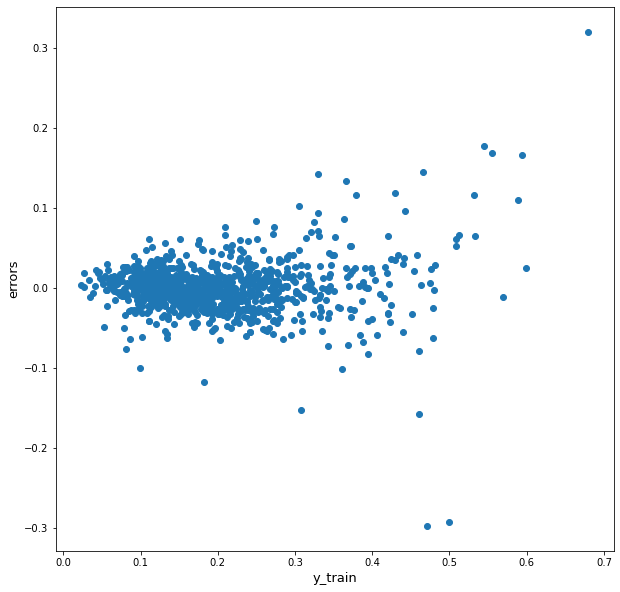

In [77]:
plt.figure(figsize=[10,10])
plt.scatter(y_pred_train,(y_train - y_pred_train))
plt.xlabel('y_train', fontsize = 13)
plt.ylabel('errors', fontsize = 13) 
plt.show()

## 

## lasso

##### Plotting scores of train and test to get the range of optimum alpha

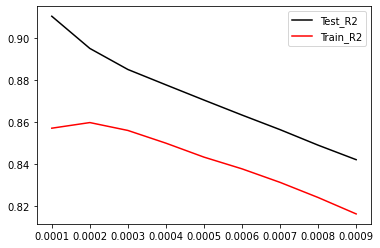

In [78]:
# List to store scores of test data
tst = []

# List to store scores of train data
trn = []

# List to store alpha values
alp = []

for i in range(1,10):
    
    i = i/10000
    
    alp.append(i)
    
    # Fitting lasso model
    lasso = Lasso(alpha=i)
    lasso.fit(X_train, y_train)

    # Predicting train and test
    y_pred_train = lasso.predict(X_train)
    y_pred_test = lasso.predict(X_test)

    # Getting score of train data
    r2_train_lr = r2_score(y_train, y_pred_train)
    trn.append(r2_train_lr)

    # Getting score of test data
    r2_test_lr = r2_score(y_test, y_pred_test)
    tst.append(r2_test_lr)
    

# Plotting scores of train and test
plt.plot(alp,trn,color="black")
plt.plot(alp,tst,color="red")
plt.legend(['Test_R2','Train_R2'])

In [79]:
# specifying range of hyperparameters to tune
hyper_params = {'alpha': [i/100000 for i in range(1,10)] + [i/10000 for i in range(1,10)] + 
                          [i/1000 for i in range(1,10)]}

# getting lasso
lasso = Lasso()
    
# calling GridSearchCV()
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   25.8s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 2e-05, 3e-05, 4e-05, 5e-05, 6e-05,
                                   7e-05, 8e-05, 9e-05, 0.0001, 0.0002, 0.0003,
                                   0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
                                   0.0009, 0.001, 0.002, 0.003, 0.004, 0.005,
                                   0.006, 0.007, 0.008, 0.009]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [80]:
# Printing the best hyperparameter alpha
alpha_lass = model_cv.best_params_['alpha']
print(alpha_lass)

0.0003


In [81]:
#Fitting lasso model for alpha and printing coefficients which have been penalised
lasso = Lasso(alpha=alpha_lass)       
lasso.fit(X_train, y_train) 
print(lasso.coef_)

[-0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  4.62615986e-03  0.00000000e+00  8.64223995e-03
  0.00000000e+00  0.00000000e+00  1.92135925e-01  0.00000000e+00
  1.10710234e-02  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  2.04021515e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  8.32172224e-03 -0.00000000e+00  0.00000000e+00 -2.98339792e-03
  0.00000000e+00  0.00000000e+00 -8.28999216e-03 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -8.09667390e-04  3.53628362e-03 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.05567221e-04  1.48884111e-02
 -2.47917294e-03 -2.73296224e-03 -8.76813151e-03  4.37518288e-17
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.71847134e-02 -1.58963819e-02
 -0.00000000e+00 -1.05220665e-03 -1.35371075e-03 -0.00000000e+00
 -3.79096611e-03  0.00000000e+00 -0.00000000e+00  3.66701016e-02
  2.86495379e-02 -3.91762

In [82]:
# Getting list of all co-efficients
coefl = list(lasso.coef_)

dfl = []
for i in range(0,len(Xvar)):
    dfl.append([Xvar[i],coefl[i]])

# Data frame with varibles and their respective co-efficients
las = pd.DataFrame(dfl,columns=['variable','coef'])

las = las.sort_values(by = 'coef', ascending = False)

las.head(10)

variable      coef
10               GrLivArea  0.192136
84   OverallQual_Excellent  0.055873
356  FullBath_Misc_Cvalues  0.042554
499           GarageCars_3  0.039707
366         KitchenQual_Ex  0.036848
59    Neighborhood_NoRidge  0.036670
66    Neighborhood_StoneBr  0.035847
89   OverallQual_Very Good  0.032860
294           ExterQual_Ex  0.030727
60    Neighborhood_NridgHt  0.028650

In [83]:
las = las.sort_values(by = 'coef', ascending = True)

las.head(10)

variable      coef
488         GarageYrBlt_2007.0 -0.020531
354                 FullBath_1 -0.017843
51        Neighborhood_Edwards -0.015896
343               CentralAir_N -0.015030
297               ExterQual_TA -0.015013
95            OverallCond_Fair -0.014902
83   OverallQual_Below Average -0.012966
545      SaleCondition_Abnorml -0.012368
377    Functional_Misc_Cvalues -0.012253
212          YearRemodAdd_1950 -0.010981

###### Train and test score for the best alpha

In [84]:
# calculating R2 score
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_ll = r2_score(y_train, y_pred_train)
print('R2 score for train data',r2_train_ll)

r2_test_ll = r2_score(y_test, y_pred_test)
print('R2 score for test data',r2_test_ll)

print('Percentage error of score in test and train is',((r2_train_ll-r2_test_ll)/r2_train_ll)*100)

R2 score for train data 0.8851816744888791
R2 score for test data 0.8561047115147413
Percentage error of score in test and train is 3.284858217487088


### Model evaluation for lasso

##### Error terms are normally distributed with mean zero

<Figure size 2160x2160 with 0 Axes>

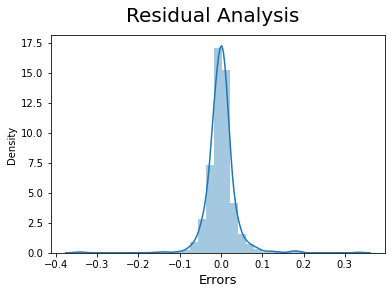

In [85]:
# Plot the histogram of the error terms
plt.figure(figsize = (30, 30))
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 35)
fig.suptitle('Residual Analysis', fontsize = 20)
plt.xlabel('Errors', fontsize = 13)
plt.show()

#### Error terms have constant variance

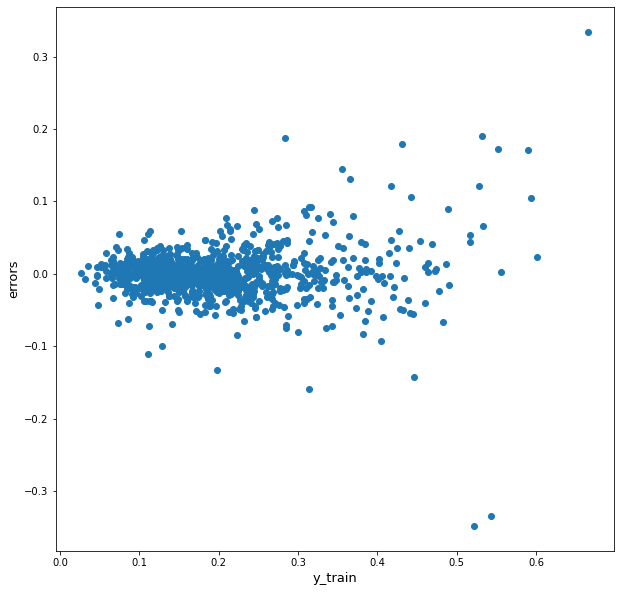

In [86]:
plt.figure(figsize=[10,10])
plt.scatter(y_pred_train,(y_train - y_pred_train))
plt.xlabel('y_train', fontsize = 13)
plt.ylabel('errors', fontsize = 13) 
plt.show()

### 

# Conclusion

### Since the error percentage is less for the 'LASSO' model. Lasso is selected as the best fit model.

# 

# Assignment Part-II

*Detailed description for some questions are given in pdf

1) What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

The optimal value of alpha for ridge is 16 <br>
The optimal value of alpha for lasso is 0.0003 <br>

###### Running Ridge and Lasso for above question

##### Ridge

In [87]:
# Fitting Ridge model for alpha and printing coefficients which have been penalised
ridge = Ridge(alpha=2*alpha_rfe)

ridge.fit(X_train, y_train)

Ridge(alpha=32)

In [88]:
# calculating R2 score
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score for train data',r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score for test data',r2_test_lr)

print('Percentage error of score in test and train is',((r2_train_lr-r2_test_lr)/r2_train_lr)*100)

R2 score for train data 0.8839846867611914
R2 score for test data 0.8268283070724846
Percentage error of score in test and train is 6.465765815256436


The percentage error is decreased but the scores are also decrceased

 #### 

In [89]:
# Getting list of all co-efficients
coefr = list(ridge.coef_)

dfr = []
for i in range(0,len(Xvar)):
    dfr.append([Xvar[i],coefr[i]])

# Data frame with varibles and their respective co-efficients
rid = pd.DataFrame(dfr,columns=['variable','coef'])

rid = rid.sort_values(by = 'coef', ascending = False)

rid.head(10)

variable      coef
499               GarageCars_3  0.028213
356      FullBath_Misc_Cvalues  0.026719
366             KitchenQual_Ex  0.025880
84       OverallQual_Excellent  0.025134
294               ExterQual_Ex  0.022482
381               Fireplaces_2  0.021738
10                   GrLivArea  0.021376
376  TotRmsAbvGrd_Misc_Cvalues  0.020774
307                BsmtQual_Ex  0.019677
59        Neighborhood_NoRidge  0.019014

`The above variables are top 10 in positive correlation.`

In [90]:
rid = rid.sort_values(by = 'coef', ascending = True)
rid.head(10)

variable      coef
354                 FullBath_1 -0.024134
297               ExterQual_TA -0.016775
497               GarageCars_1 -0.016526
83   OverallQual_Below Average -0.016476
51        Neighborhood_Edwards -0.016133
82         OverallQual_Average -0.014414
370             TotRmsAbvGrd_4 -0.013358
369             KitchenQual_TA -0.012527
52        Neighborhood_Gilbert -0.010956
54        Neighborhood_MeadowV -0.010775

`The above variables are top 10 in negative correlation.`

`The above variables are top 20 most important.`

### 

###### Lasso

In [91]:
#Fitting lasso model for alpha and printing coefficients which have been penalised
lasso = Lasso(alpha=2*alpha_lass)       
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0006)

In [92]:
# calculating R2 score
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train_ll = r2_score(y_train, y_pred_train)
print('R2 score for train data',r2_train_ll)

r2_test_ll = r2_score(y_test, y_pred_test)
print('R2 score for test data',r2_test_ll)

print('Percentage error of score in test and train is',((r2_train_ll-r2_test_ll)/r2_train_ll)*100)

R2 score for train data 0.8634464974499722
R2 score for test data 0.8377897676143804
Percentage error of score in test and train is 2.971432498870991


The percentage error is decreased but the scores are also decreased

### 

In [93]:
# Getting list of all co-efficients
coefl = list(lasso.coef_)

dfl = []
for i in range(0,len(Xvar)):
    dfl.append([Xvar[i],coefl[i]])

# Data frame with varibles and their respective co-efficients
las = pd.DataFrame(dfl,columns=['variable','coef'])

las = las.sort_values(by = 'coef', ascending = False)

las.head(10)

variable      coef
10               GrLivArea  0.160079
499           GarageCars_3  0.044473
366         KitchenQual_Ex  0.040799
356  FullBath_Misc_Cvalues  0.038305
84   OverallQual_Excellent  0.037963
294           ExterQual_Ex  0.037107
381           Fireplaces_2  0.028486
89   OverallQual_Very Good  0.026133
59    Neighborhood_NoRidge  0.025572
318        BsmtExposure_Gd  0.025243

`The above variables are top 10 in positive correlation.`

In [94]:
las = las.sort_values(by = 'coef', ascending = True)

las.head(10)

variable      coef
354                 FullBath_1 -0.022091
297               ExterQual_TA -0.018089
343               CentralAir_N -0.016611
83   OverallQual_Below Average -0.012546
51        Neighborhood_Edwards -0.012091
379               Fireplaces_0 -0.011519
212          YearRemodAdd_1950 -0.011324
488         GarageYrBlt_2007.0 -0.008580
26                 MSZoning_RM -0.008490
377    Functional_Misc_Cvalues -0.007563

`The above variables are top 10 in negative correlation.`

`The above variables are top 20 important.`

# 

2) You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

Since the error percentage is less for the 'LASSO' model. Lasso is selected as the best fit model.<br>
And also feature selection is done in lasso.

# 

3) After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

###### Building lasso again removing the top5

In [95]:
tl5 = ['GrLivArea','GarageCars_3','KitchenQual_Ex','FullBath_Misc_Cvalues','OverallQual_Excellent']
print('Top 5 variables in lasso are',tl5)

Top 5 variables in lasso are ['GrLivArea', 'GarageCars_3', 'KitchenQual_Ex', 'FullBath_Misc_Cvalues', 'OverallQual_Excellent']


In [96]:
# Dropping the top5
X_trainq3 = X_train.drop(columns = tl5, axis = 1)
Xvarq3 = list(X_trainq3.columns)

# specifying range of hyperparameters to tune
hyper_params = {'alpha': [i/100000 for i in range(1,10)] + [i/10000 for i in range(1,10)]}

# getting lasso
lasso = Lasso()
    
# calling GridSearchCV()
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = 5, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_trainq3, y_train) 

# Printing the best hyperparameter alpha
alpha_lass2 = model_cv.best_params_['alpha']
print(alpha_lass2)


#Fitting lasso model for alpha and printing coefficients which have been penalised
lasso = Lasso(alpha=alpha_lass2)       
lasso.fit(X_trainq3, y_train) 

# Getting list of all co-efficients
coefl = list(lasso.coef_)


dfl = []
for i in range(0,len(Xvarq3)):
    dfl.append([Xvarq3[i],coefl[i]])

# Data frame with varibles and their respective co-efficients
las = pd.DataFrame(dfl,columns=['variable','coef'])

las = las.sort_values(by = 'coef', ascending = False)

las.head(5)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   19.2s finished


0.0002


variable      coef
7                1stFlrSF  0.199047
8                2ndFlrSF  0.060207
65   Neighborhood_StoneBr  0.048968
58   Neighborhood_NoRidge  0.041074
292          ExterQual_Ex  0.037664

In [97]:
las = las.sort_values(by = 'coef', ascending = True)

las.head(5)

variable      coef
378  Fireplaces_3 -0.057746
352    FullBath_1 -0.051604
493  GarageCars_1 -0.041065
494  GarageCars_2 -0.034371
353    FullBath_2 -0.034350

In [98]:
tl5n = ['1stFlrSF','2ndFlrSF','Fireplaces_3','FullBath_1','Neighborhood_StoneBr']
print('Top 5 varibles in lasso after re-modelling are',tl5n)

Top 5 varibles in lasso after re-modelling are ['1stFlrSF', '2ndFlrSF', 'Fireplaces_3', 'FullBath_1', 'Neighborhood_StoneBr']


# 

4) How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

###### Getting train and test scores for different random states(shuffling the data)

*alphas for ridge and lasso are not changed for every shuffle

In [99]:
# List to set the random state
rand_list=[10,20,30,40,50,60,70,80,90,100]

rand_exp = []
for i in rand_list:
    
    np.random.seed(0)
    dfm_train, dfm_test = train_test_split(dfm, train_size = 0.7, test_size = 0.3, random_state=i)
    
   # Using minmax scaling
    scaler = MinMaxScaler()
    
    # Fit transforming train data
    dfm_train[clno] = scaler.fit_transform(dfm_train[clno])
    
    # Transforming test data
    dfm_test[clno] = scaler.transform(dfm_test[clno])
    
    # Splitting train data
    y_train = dfm_train.pop('SalePrice')
    X_train = dfm_train
    
    # Splitting test data
    y_test = dfm_test.pop('SalePrice')
    X_test = dfm_test
    
#-----------------------------Ridge------------------------------------------------------------------------------
    
    #Fitting Ridge model for alpha and printing coefficients which have been penalised
    ridge = Ridge(alpha=alpha_rfe)

    ridge.fit(X_train, y_train)
    
    # Lets calculate some metrics such as R2 score
    y_pred_train = ridge.predict(X_train)
    y_pred_test = ridge.predict(X_test)

    r2_train_lr = r2_score(y_train, y_pred_train)
    

    r2_test_lr = r2_score(y_test, y_pred_test)
    
    erid = ((r2_train_lr-r2_test_lr)/r2_train_lr)*100
    
  
 #------------------------------Lasso----------------------------------------------------------------------------------
        
    #Fitting lasso model for alpha and printing coefficients which have been penalised
    lasso = Lasso(alpha=alpha_lass)       
    lasso.fit(X_train, y_train) 
    
    
    # Lets calculate some metrics such as R2 score
    y_pred_train = lasso.predict(X_train)
    y_pred_test = lasso.predict(X_test)

    r2_train_ll = r2_score(y_train, y_pred_train)

    r2_test_ll = r2_score(y_test, y_pred_test)
    
    elass = ((r2_train_ll-r2_test_ll)/r2_train_ll)*100
    
#-------------------------------RFE--------------------------------------------------------------------------------------
    
    # Getting lm
    lm = LinearRegression()

    # Fitting the linear model
    lm.fit(X_train, y_train)

    # Running RFE to drop 100 variables 
    rfe = RFE(lm,100)

    # Fitting the RFE model
    rfe = rfe.fit(X_train, y_train)
        
    # Knowing the rfe support and rank
    drfe = {'X_train':X_train.columns,'RFE_decision':rfe.support_,'Rank_rfe':rfe.ranking_}
    dfrfe = pd.DataFrame(data=drfe)
    
    # Columns removed by performing RFE
    Lrfe_reject = list(dfrfe[dfrfe.RFE_decision == False]['X_train'])
    
    
    X_train_rfe = X_train.copy()
    X_train_rfe = X_train_rfe.drop(Lrfe_reject , axis = 1)

    X_train_c = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train, X_train_c).fit()

    # Clubbing the rejected variables from RFE and MFE
    l_rfe_mfe=Lrfe_reject

    # Dropping the variables which are rejected by RFE and Adding Constant to test
    X_test_rfe = X_test.copy()
    X_test_rfe = X_test_rfe.drop(l_rfe_mfe, axis = 1)
    X_test_c = sm.add_constant(X_test_rfe,prepend=True, has_constant='add')
    y_test_pred = lm.predict(X_test_c)
    
    a = lm.rsquared_adj
    
    b = r2_score(y_test, y_test_pred)
    
    
    erfe = ((a-b)/a)*100
    
    
    rand_exp.append([i,r2_train_lr,r2_test_lr,erid,r2_train_ll,r2_test_ll,elass,a,b,erfe])
    
    clear_output(wait=True)
    
    print('Loaded',i,'%')
                     


Loaded 100 %


In [100]:
rand_df = pd.DataFrame(rand_exp,columns=['Random state','Ridge train score','Ridge test score','Ridge error%','lasso train score','lasso test score','lasso error%','RFE train score','RFE test score','RFE error%'])

In [101]:
rand_df

Random state  Ridge train score  Ridge test score  Ridge error%  \
0            10           0.913232          0.804667     11.888033   
1            20           0.893293          0.865273      3.136673   
2            30           0.898687          0.834540      7.137914   
3            40           0.889893          0.876838      1.467004   
4            50           0.893701          0.846821      5.245590   
5            60           0.892108          0.872490      2.199050   
6            70           0.930733          0.753237     19.070538   
7            80           0.894385          0.846262      5.380513   
8            90           0.913957          0.788211     13.758491   
9           100           0.894390          0.848854      5.091306   

   lasso train score  lasso test score  lasso error%  RFE train score  \
0           0.907007          0.794122     12.445819         0.894395   
1           0.886290          0.871318      1.689269         0.877893   
2           0.885182          0.856105      3.284858         0.774590   
3           0.882183          0.886935     -0.538619         0.721330   
4           0.881098          0.864729      1.857822         0.798362   
5           0.884308          0.879539      0.539353         0.859017   
6           0.927522          0.712445     23.188384         0.922149   
7           0.882741          0.867792      1.693491         0.849640   
8           0.906295          0.788434     13.004694         0.896357   
9           0.884378          0.866824      1.984843         0.772817   

   RFE test score  RFE error%  
0        0.715487   20.003337  
1        0.748837   14.700621  
2        0.701262    9.466734  
3        0.731310   -1.383554  
4        0.784995    1.674282  
5        0.841583    2.029565  
6        0.552300   40.107280  
7        0.860453   -1.272698  
8        0.603777   32.641027  
9        0.769642    0.410846

In [102]:
print('Mean error % for Ridge',np.mean(rand_df['Ridge error%'].abs()))

Mean error % for Ridge 7.437511074540327


In [103]:
print('Mean error % for lasso',np.mean(rand_df['lasso error%'].abs()))

Mean error % for lasso 6.022715273689203


In [104]:
print('Mean error % for RFE',np.mean(rand_df['RFE error%'].abs()))

Mean error % for RFE 12.368994362603374


<AxesSubplot:xlabel='Random state', ylabel='RFE error%'>

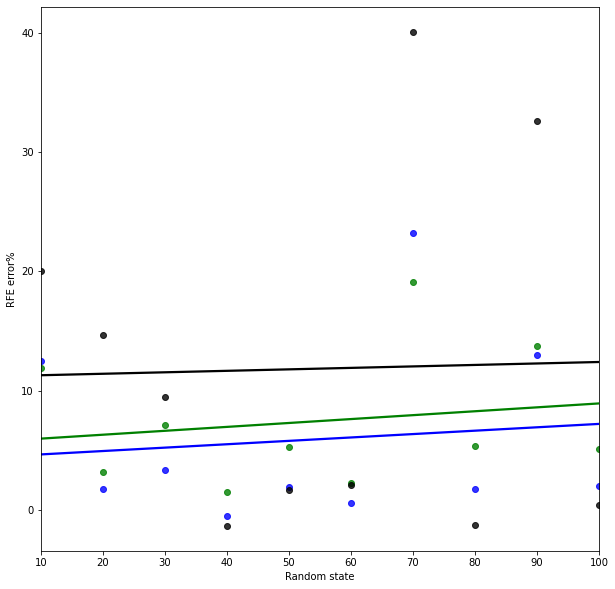

In [105]:
plt.figure(figsize=(10,10))
sns.regplot(rand_df['Random state'],rand_df['Ridge error%'],color= 'green', ci = None)
sns.regplot(rand_df['Random state'],rand_df['lasso error%'],color= 'blue',ci = None)
sns.regplot(rand_df['Random state'],rand_df['RFE error%'],color= 'black',ci = None)

Data is shuffled and %errors are calculated for ridge(alpha not changed) and lasso(alpha not changed) and RFE model

##### From the above plot and mean of %errors, Lasso is robust and accurate